<a href="https://colab.research.google.com/github/SAIKUMAR-AI/Netflix-Clustering/blob/main/Copy_of_Netflix_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    -  Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Pendiyala Sai Kumar


# **Project Summary -**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.
Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **GitHub Link -**

https://github.com/SAIKUMAR-AI/Netflix-Clustering

# **Problem Statement**


Based on the third company report we got an analysis for Netflix which is TV Shows increasing rapidly over then movies.

The goal of this project is to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Data Manipulation and calculation
from google.colab import drive #importing csv file from drive
import pandas as pd # Data manpulation
import numpy as np # handling matrices
from datetime import datetime as dt # Handling datetime
from scipy.stats import * # statistics analysis
import math # importing mathematics module

# Visulization 
import matplotlib.pyplot as plt #matplot 
import missingno as msno #visulization for missing values
%matplotlib  inline
import seaborn as sns # Visulization 
sns.set()
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from wordcloud import WordCloud, STOPWORDS

# Handling warnings
import warnings
warnings.filterwarnings('ignore')
import os
import re
from sklearn.preprocessing import RobustScaler #Handling Outliers

# extracting the stopwords from nltk library and some nlp libraries
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('punkt')
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from scipy import sparse as sp
import string
import unicodedata
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

# importing sklearn algorithms to predict the output from the model
from sklearn.cluster import KMeans
# from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Dataset Loading

In [ ]:
# Load Dataset
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/AlmaBetter/CapstoneProject/Netflix/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [ ]:
# Dataset First Look
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
for col in data.columns:
  duplicate = data.pivot_table(columns = [col], aggfunc='size')
  col
  if (duplicate.count() >1):
    duplicate
    print(duplicate)


show_id
s1       1
s10      1
s100     1
s1000    1
s1001    1
        ..
s995     1
s996     1
s997     1
s998     1
s999     1
Length: 7787, dtype: int64
type
Movie      5377
TV Show    2410
dtype: int64
title
#Alive                           1
#AnneFrank - Parallel Stories    1
#FriendButMarried                1
#FriendButMarried 2              1
#Roxy                            1
                                ..
忍者ハットリくん                         1
海的儿子                             1
마녀사냥                             1
반드시 잡는다                          1
최강전사 미니특공대 : 영웅의 탄생              1
Length: 7787, dtype: int64
director
A. L. Vijay            2
A. Raajdheep           1
A. Salaam              1
A.R. Murugadoss        2
Aadish Keluskar        1
                      ..
Çagan Irmak            1
Ísold Uggadóttir       1
Óskar Thór Axelsson    1
Ömer Faruk Sorak       2
Şenol Sönmez           2
Length: 4049, dtype: int64
cast
'Najite Dede, Jude Chukwuka, Taiwo Arimoro, Odenike Odetola,

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

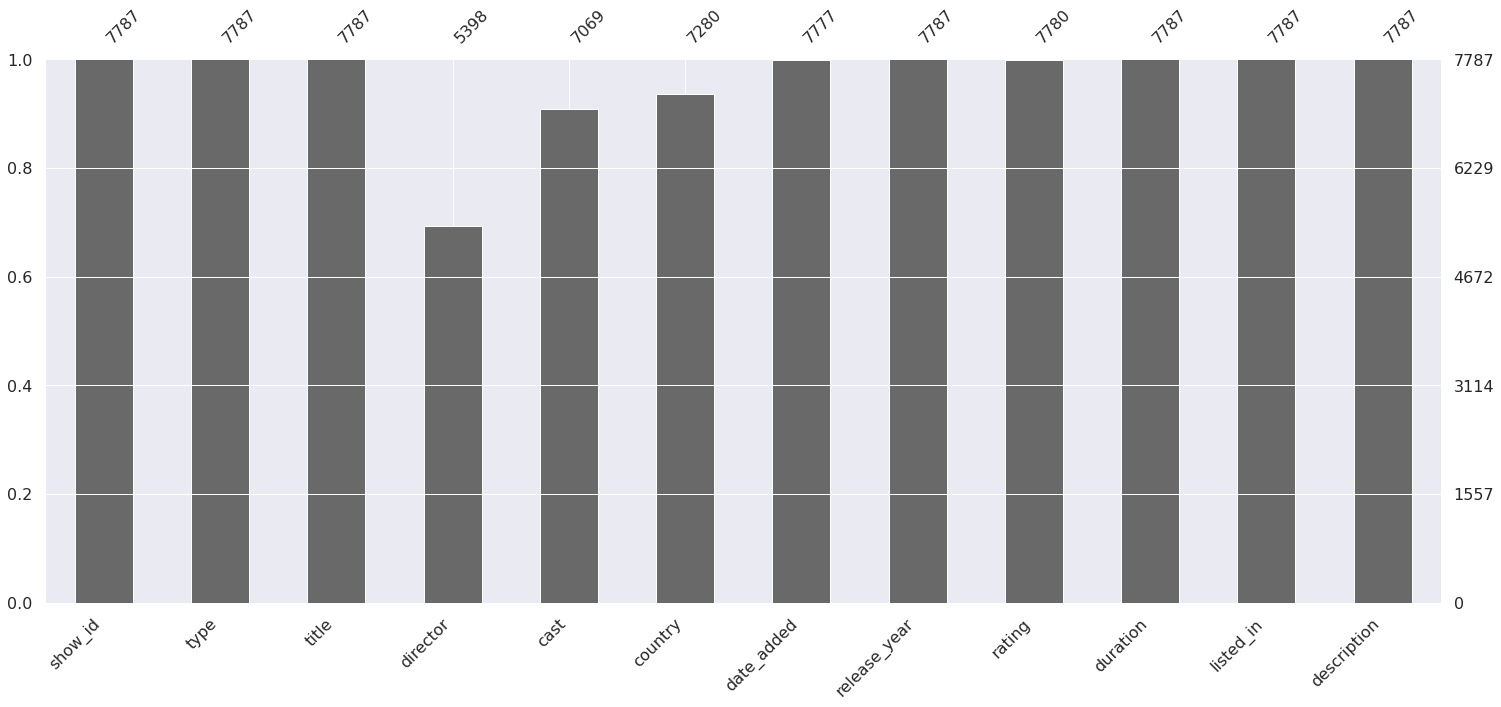

In [ ]:
# Visualizing the missing values
msno.bar(data)

### What did you know about your dataset?


Netflix clustering analysis data
1. The missing values in the director, cast, and country attributes can be  replaced with 'Unknown'
2. 10 records with missing values in the date_added column can be dropped.
3. The missing values in rating can be imputed with its mode, since this attribute is discrete.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
col = data.columns
col

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe(include = 'all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description 

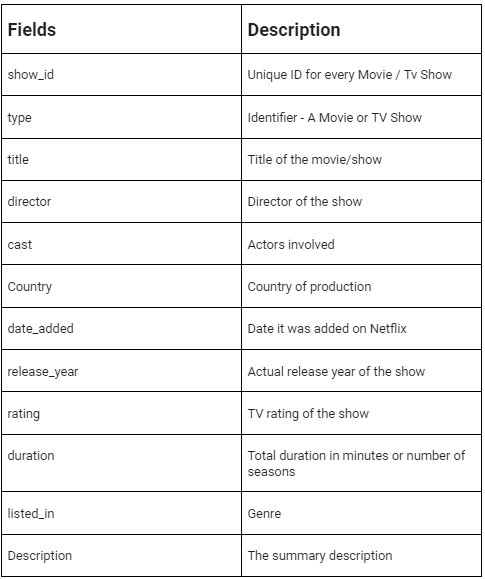

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for col in data.columns.tolist():
  print("unique values ",col," = ",data[col].nunique())

unique values  show_id  =  7787
unique values  type  =  2
unique values  title  =  7787
unique values  director  =  4049
unique values  cast  =  6831
unique values  country  =  681
unique values  date_added  =  1565
unique values  release_year  =  73
unique values  rating  =  14
unique values  duration  =  216
unique values  listed_in  =  492
unique values  description  =  7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Top Countries
data['country'].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [ ]:
# Genre of shows
data['listed_in'].value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy                      1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 492, dtype: int64

In [ ]:
# Choosing the primary country and primary genre to simplify the analysis
data['country'] = data['country'].astype(str)
data['country'] = data['country'].apply(lambda x: x.split(',')[0])
data['listed_in'] = data['listed_in'].apply(lambda x: x.split(',')[0])

In [ ]:
#Number of movies/shows from country
data['country'].value_counts()

United States     2883
India              956
United Kingdom     577
nan                507
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

In [ ]:
#Type of shows 
data['listed_in'].value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           690
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         359
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 232
Docuseries                       194
Anime Series                     148
International Movies             114
TV Comedies                      110
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             37
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Classic & Cult TV                 21
Independent Movies                20
Anime Features                    19
Music & Musicals                  17
T

In [ ]:
#Typecasting duration from string to integer
data['duration']=data['duration'].apply(lambda x:int(x.split()[0]))

In [ ]:
data.duration.dtype

dtype('int64')

In [ ]:
#Typecasting date_added from string to date and time
data['date_added']=pd.to_datetime(data['date_added'])

In [ ]:
#can see the starting and ending of movies added date
data.date_added.min(), data.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

In [ ]:
#Creating new attributes month and year referrence from date_added
data['month']=data['date_added'].dt.month
data['year']=data['date_added'].dt.year
data.drop('date_added', axis=1,inplace=True)

<Axes: xlabel='rating', ylabel='count'>

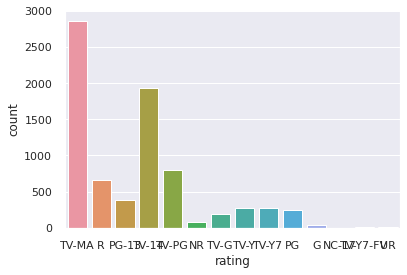

In [ ]:
#Changing ratings into age restrictions
sns.countplot(x = 'rating', data=data)

In [ ]:
data.rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
#changing rating values 
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

data['rating'].replace(rating_map, inplace = True)
data['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids', nan],
      dtype=object)

<Axes: xlabel='rating', ylabel='count'>

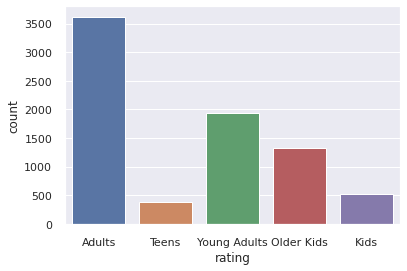

In [ ]:
sns.countplot(x='rating', data=data)

### What all manipulations have you done and insights you found?

1. Handling Nulll values.
2. Listed out top 10 country's i.e., the country holding maximun number of TV shows and movies.
3. Listed out top 10 director's.
4. Duration period has changed string to integer.
5. dated has been changed string into datetime.
6. Datetime has splited into more number of features like day, month and year.
7. More number of ratings segregated.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Pie Plot

In [ ]:
# Chart - 1 visualization code
#code for plotly visualisation
fig_donut = px.pie(data, names='type', height=250, width=500, hole=0.5,
title="Movie's & TV Shows Ratio",
color_discrete_sequence=['#b20710', '#221f1f'])
fig_donut.update_traces(hovertemplate=None, textposition='outside',
textinfo='percent+label', rotation=90)
fig_donut.update_layout(margin=dict(t=60, b=30, l=0, r=0), showlegend=False,
plot_bgcolor='#111', paper_bgcolor='#111',
title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
font=dict(size=17, color='#8a8d93'),
hoverlabel=dict(bgcolor="#444", font_size=13,
font_family="Lato, sans-serif"))
fig_donut.show(renderer='colab')

##### 1. Why did you pick the specific chart?

To Know the Percentage of Movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

There are more movies then TV shows

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Handling both TV Shows and Movies is an challenging task for an netflix

#### Chart - 2 - Director plot analysis

Text(0.5, 1.0, 'Top 10 directors')

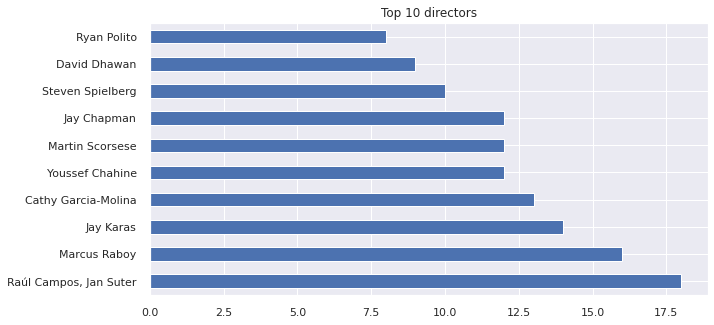

In [ ]:
# Chart - 2 visualization code
# Top 10 directors in the dataset
plt.figure(figsize=(10,5))
data[~(data['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 directors')

##### 1. Why did you pick the specific chart?

We will see the top 10 directors in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Rahul Campos and Jan Suter both together directed 18 movies/TV shows.

#### Chart - 3 - Country analysis

Text(0.5, 1.0, ' Top 10 countries')

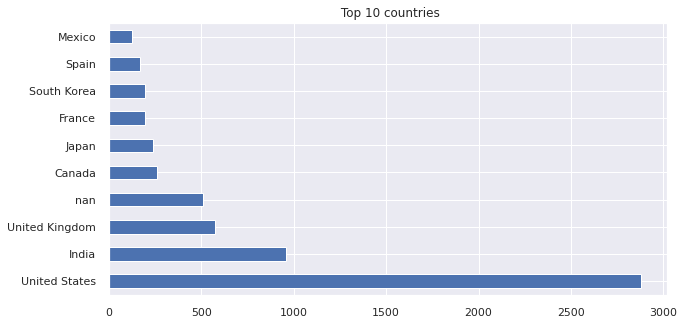

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(10,5))
data[~(data['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh')
plt.title(' Top 10 countries')

##### 1. Why did you pick the specific chart?

As analysis the plot will know the top ten countries in the dataset which have more movies/TV shows.

##### 2. What is/are the insight(s) found from the chart?

AS we see the bar plots the United States have more number of TV shows and movies and followed by India, United Kingdom.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Needs to improve and analysis on the other countries.

#### Chart - 4 - Releas year 

Text(0.5, 1.0, 'distribution by released year')

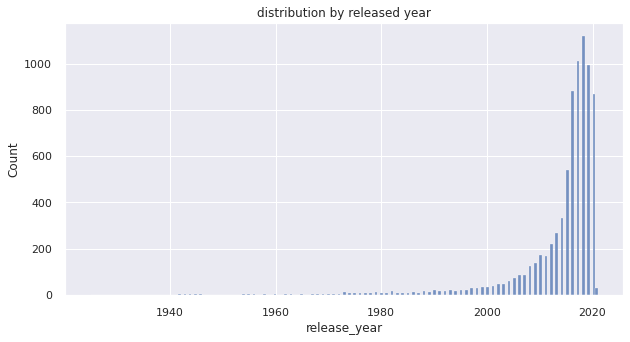

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(10,5))
sns.histplot(data['release_year'])
plt.title('distribution by released year')

##### 1. Why did you pick the specific chart?

Distribution of this graph giving the information anbout in which year movies/TV shows released.

##### 2. What is/are the insight(s) found from the chart?

2018 is the higest year which contains more number of movies/TV shows followed by 2017, 2019.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As comparing the releasing year data in dataset after 2018 its slowly decreasing the number of TV shows/movies.

#### Chart - 5 - Month analysis

Text(0.5, 0, '')

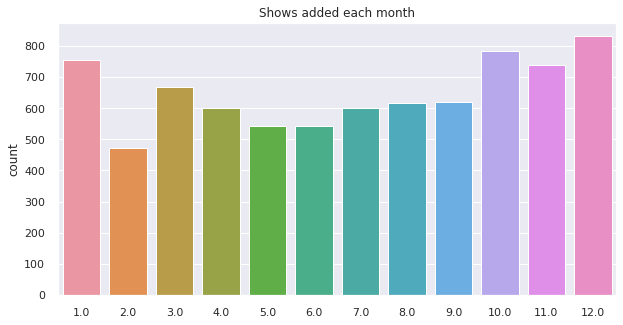

In [ ]:
# Chart - 5 visualization code
# Number of shows added on different months
plt.figure(figsize = (10,5)) 
sns.countplot(x='month',data=data)

plt.title('Shows added each month')
plt.xlabel('')

##### 1. Why did you pick the specific chart?

Monthly analysis as per given dataset

##### 2. What is/are the insight(s) found from the chart?

October, November, December and January months have the peak time which contains more data.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Will understand the data which month having more data as well as least data in other months.

#### Chart - 6 - Year analysis

Text(0.5, 0, '')

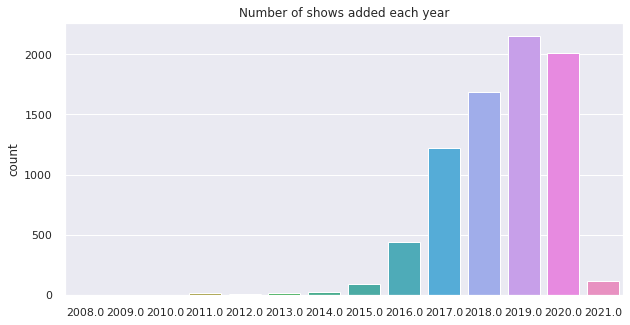

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize = (10,5)) 
sns.countplot(x='year',data=data)
plt.title('Number of shows added each year')
plt.xlabel('')

##### 1. Why did you pick the specific chart?

The data contains which year movie or TV shows added.

##### 2. What is/are the insight(s) found from the chart?

Netflix continuous to add more shows on its platform over the years.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is a decrease in the number of shows added in the year 2020, which might be attributed to the covid-19-induced lockdowns, which halted the creation of shows.
We have Netflix data only up to 16th January 2021, hence there are less movies added in this year.

#### Chart - 7 - TV Shows and Movies Analysis

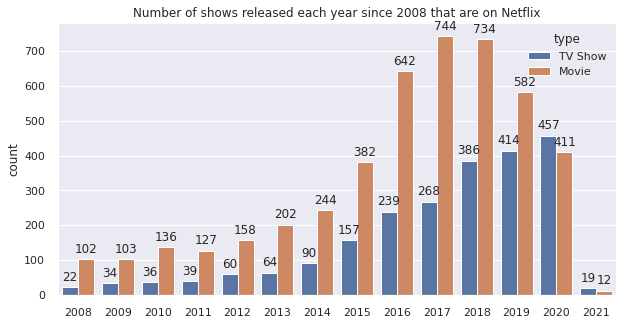

In [ ]:
# Chart - 7 visualization code
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(10,5))
p = sns.countplot(x='release_year',data=data, hue='type',
                  order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

##### 1. Why did you pick the specific chart?

This plot will gives the both movies and shows each year. 

##### 2. What is/are the insight(s) found from the chart?

1. Over the years, Netflix has consistently focused on adding more shows in its platform.
2. Though there was a decrease in the number of movies added in 2020, this pattern did not exist in the number of TV shows added in the same year.
3. This might signal that Netflix is increasingly concentrating on introducing more TV series to its platform rather than movies.

#### Chart - 8 - Number of Seasons Analysis 

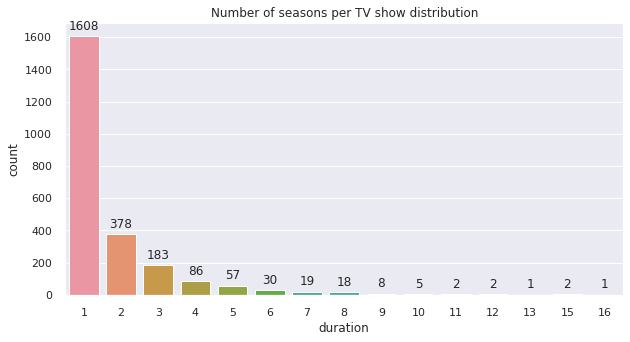

In [ ]:
# Chart - 8 visualization code
# Seasons in each TV show
plt.figure(figsize=(10,5))
p = sns.countplot(x='duration',data=data[data['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

##### 1. Why did you pick the specific chart?

Gives the information about which show have the more seasons.

##### 2. What is/are the insight(s) found from the chart?

The TV series in the dataset have up to 16 seasons, however the bulk of them only have one. 
There are very few TV shows that have more than 8 seasons.

#### Chart - 9 - Duration Distribution Analysis

Text(0.5, 1.0, 'Movie duration distribution')

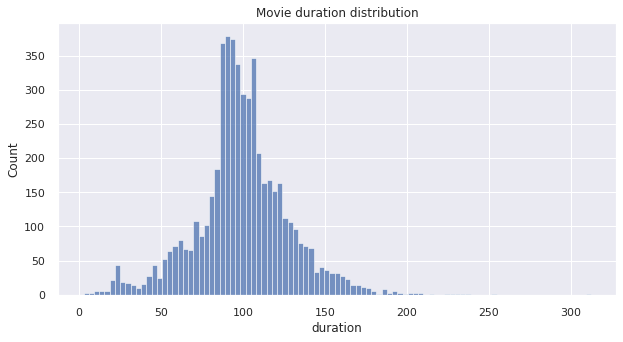

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=data[data['type']=='Movie'])
plt.title('Movie duration distribution')

##### 1. Why did you pick the specific chart?

Length of movie analysis.

##### 2. What is/are the insight(s) found from the chart?

In [ ]:
data[data['type']=='Movie'].duration.describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

The minimum duration of 3 minutes and maximum is 312 minutes.

#### Chart - 10 - Type of Movies analysis

Text(0.5, 1.0, 'Top 10 genres for movies')

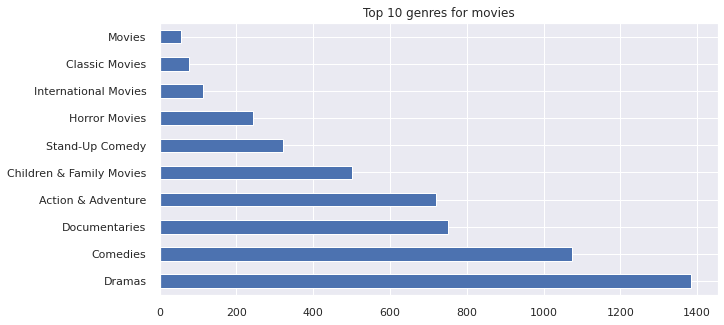

In [ ]:
# Chart - 10 visualization code
# Top 10 genre for movies
plt.figure(figsize=(10,5))
data[data['type']=='Movie'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for movies')

##### 1. Why did you pick the specific chart?

In movies which type of Genre having the more data.

##### 2. What is/are the insight(s) found from the chart?

Dramas, comedy and documentry have more movies.

#### Chart - 11 - Type of TV Shows

Text(0.5, 1.0, 'Top 10 genres for movies')

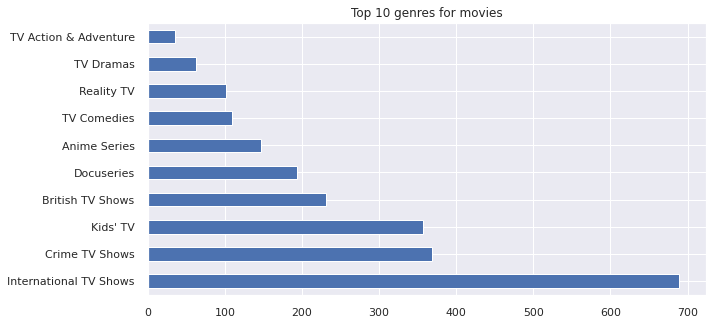

In [ ]:
# Chart - 11 visualization code
# Top 10 genre for movies
plt.figure(figsize=(10,5))
data[data['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for movies')

##### 1. Why did you pick the specific chart?

As we know the more type of data in Genre we can see in the tv shows.

##### 2. What is/are the insight(s) found from the chart?

International TV Shows, Kids TV, Crime TV Show have the more popular.

#### Chart - 12 - Movie Length

Text(0.5, 0, 'Year')

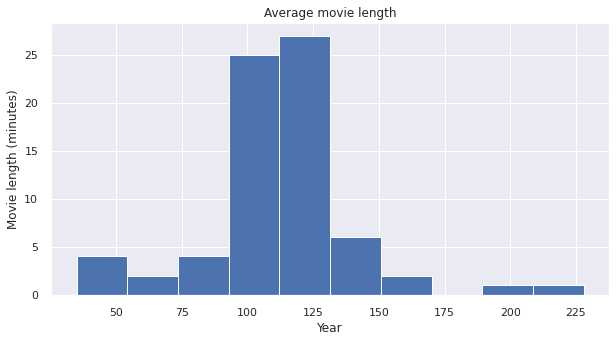

In [ ]:
# Chart - 12 visualization code
# Average movie length over the years
plt.figure(figsize=(10,5))
data[data['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='hist')
plt.title('Average movie length')
plt.ylabel('Movie length (minutes)')
plt.xlabel('Year')

##### 1. Why did you pick the specific chart?

Average movie length in a year.

##### 2. What is/are the insight(s) found from the chart?

After 2000 year netflix movies have been continuosly decerasing.

#### Chart - 13 - WordCloud

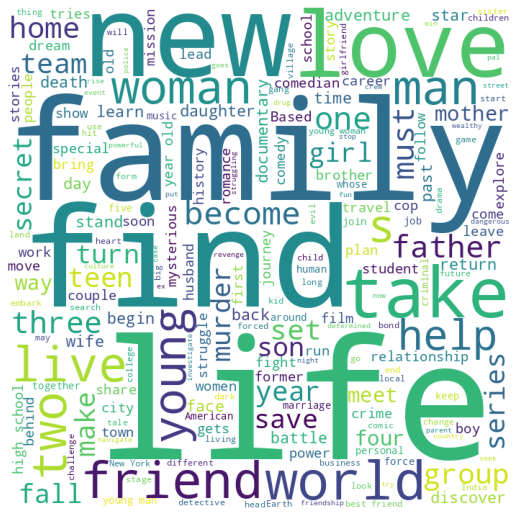

In [ ]:
# Chart - 13 visualization code
comment_words = ''
stopwords = set(STOPWORDS)

for term in data.description.values:
    
    # typecaste each val to string
    term = str(term)

    # split the value
    tokens = term.split()  
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image                      
plt.figure(figsize = (14,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

##### 1. Why did you pick the specific chart?

plotting the some key words which contains from the Netflix data

##### 2. What is/are the insight(s) found from the chart?

Type of keywords from Netflix dataset like: family, friend, find, love, woman, young, man, love etc

#### Chart - 14 - Correlation Heatmap

<Axes: >

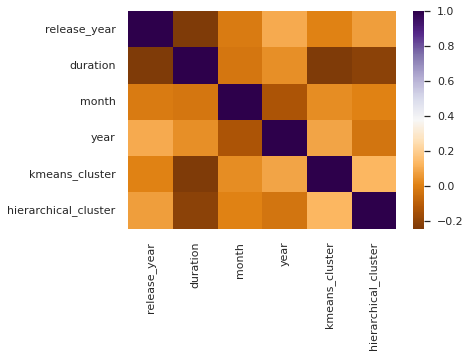

In [ ]:
# Correlation Heatmap visualization code

corr_matrix=data.corr()
 
# plot it
sns.heatmap(corr_matrix, cmap='PuOr')

##### 1. Why did you pick the specific chart?

Calculate correlation between each pair of variable

##### 2. What is/are the insight(s) found from the chart?

Here the correlation range -0.2 to 1.0.
Whenever its corelating with self column we will get the higher corelation and with other column we are -0.2 to 0.2 approx.

#### Chart - 15 - Pair Plot 

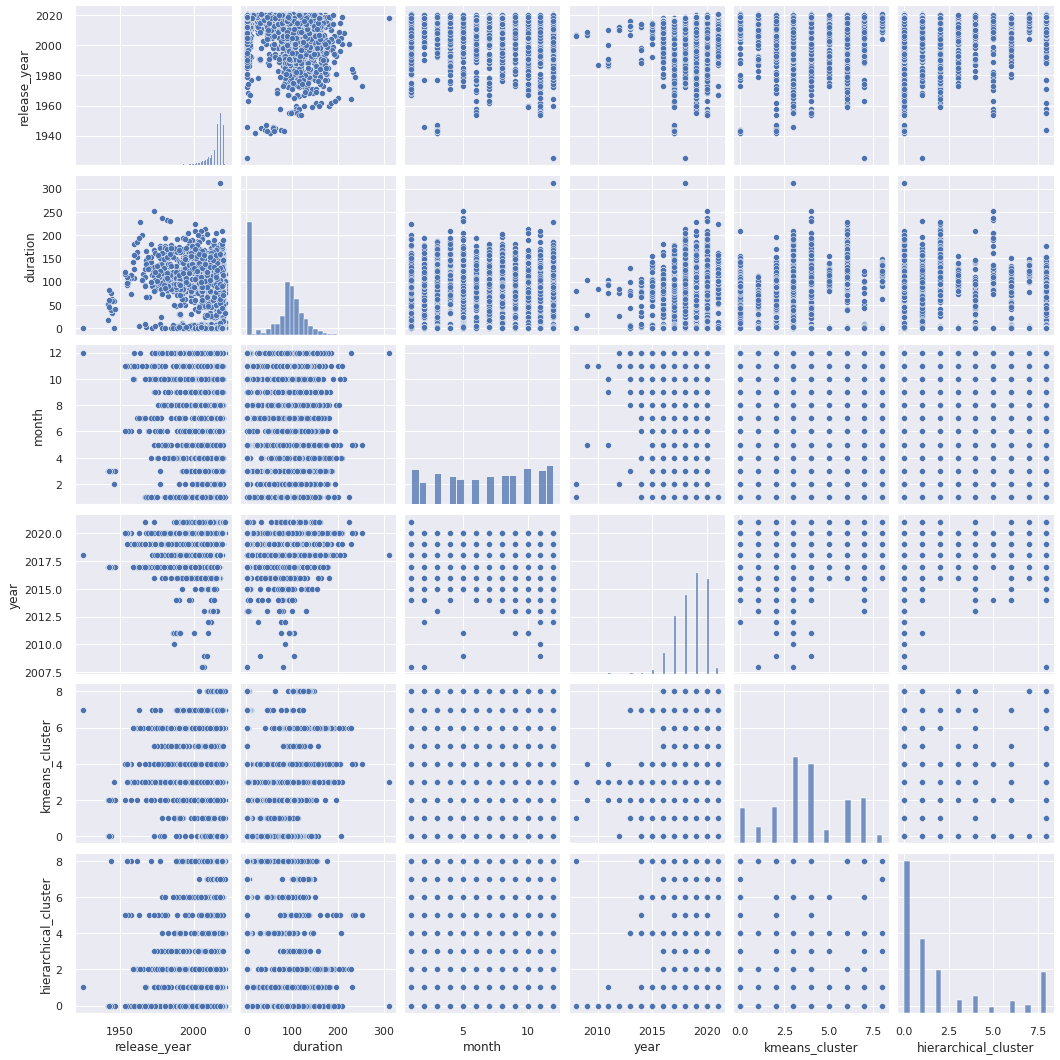

In [ ]:
# Pair Plot visualization code
sns.pairplot(data)

##### 1. Why did you pick the specific chart?

Pair plot Analysis: Gives the dataset distribution.

##### 2. What is/are the insight(s) found from the chart?

The pair plot taken features as follows: release_year, duration, month, year.


#### Chart - 16 -World Map 

In [ ]:
# all country df
all_countries = data.groupby(['country','type']).count()['show_id'].reset_index()
#country wise content for top countries
country_count = {}
for i in range(len(all_countries)):
    l = all_countries['country'][i].split(', ')
    for x in l:
        x = re.sub('[^A-Za-z0-9 ]+', '', x)
        if x not in country_count.keys():
            country_count[x] = all_countries['show_id'][i]
        else:
            country_count[x] += all_countries['show_id'][i]
country_df = pd.DataFrame(list(zip(country_count.keys(), country_count.values())), columns =['country', 'count']) 

In [ ]:
#total content per country
sns.set_theme()
trace = go.Choropleth(
            locations = list(country_count.keys()),
            locationmode='country names',
            z = list(country_count.values()),
            text = country_df['country'],
            reversescale = False,
            zauto = True,
            colorscale = 'RdBu',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Total Content',
                tickprefix = '')
        )

data = [trace]
layout = go.Layout(
    title = 'Total content per country',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

##### 1. Why did you pick the specific chart?

Visulize country wise data in world map.

##### 2. What is/are the insight(s) found from the chart?

Can see the country wise variation.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Is 90 minutes the mean length of a movie on Netflix?
2. Number of Adults have the movies collection is 100 in the given dataset?
3. Overall Netflix released number of movies and TV shows 500?

In [ ]:
# Creating Parameter Class 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value
    
  


# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Is 90 minutes the mean length of a movie on Netflix?

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypothesis_1=data["duration"]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 90
sample_mean = hypothesis_1.mean()
size = len(hypothesis_1)
std=(variance(hypothesis_1))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=hypothesis_1,col="Duration")
# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 1.3799134922373904e-286


##### Which statistical test have you done to obtain P-Value?

z-test is used to do statistical test which gives the p-value

##### Why did you choose the specific statistical test?

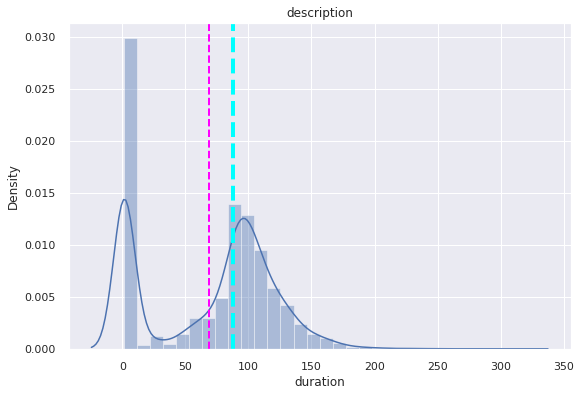

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypothesis_1)
sns.distplot(hypothesis_1)
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=4)
ax.set_title(col)
plt.show()

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Number of Adults have the movies collection is 100 in the given dataset?

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypothesis_2=data[(data['rating'])=='Adults'].value_counts()
# Getting the required parameter values for hypothesis testing
hypothesis_number = 100
sample_mean = hypothesis_1.mean()
size = len(hypothesis_2)
std=(variance(hypothesis_2))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=hypothesis_2,col="Duration")
# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 0.0


##### Which statistical test have you done to obtain P-Value?

z-test is used to do statistical test which gives the p-value

##### Why did you choose the specific statistical test?

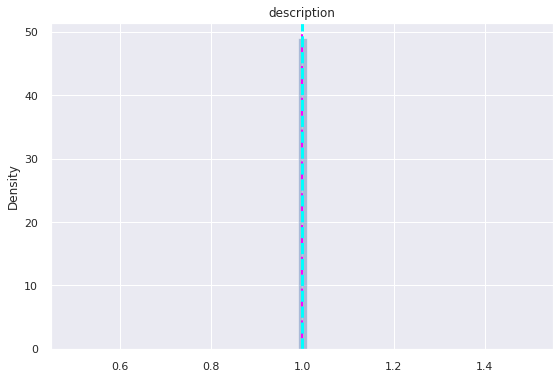

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypothesis_2)
sns.distplot(hypothesis_2)
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=3)
ax.set_title(col)
plt.show()

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Overall Netflix released number of movies and TV shows 500?

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypothesis_3=data["release_year"]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 500
sample_mean = hypothesis_3.mean()
size = len(hypothesis_3)
std=(variance(hypothesis_3))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=hypothesis_3,col="Ratings")
# Getting Conclusion
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 1.0.


##### Which statistical test have you done to obtain P-Value?

z-test is used to do statistical test which gives the p-value

##### Why did you choose the specific statistical test?

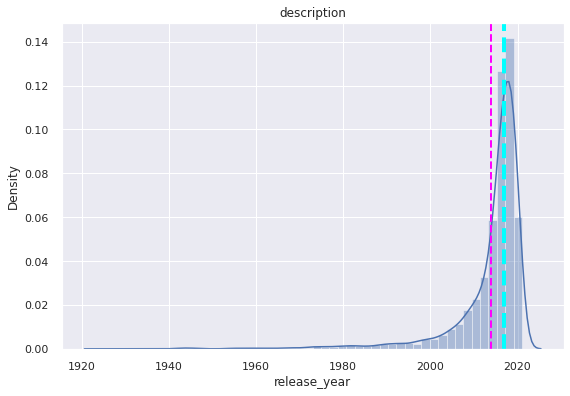

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypothesis_3)
sns.distplot(hypothesis_3)
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=4)
ax.set_title(col)
plt.show()

### Hypothetical Statement - 2

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

<Axes: >

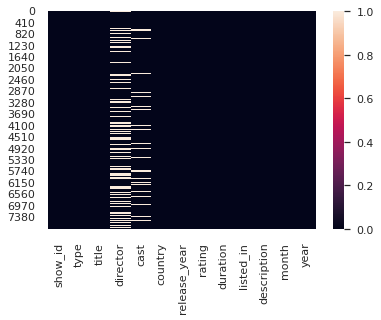

In [ ]:
# Handling Missing Values & Missing Value Imputation

#Null values Heatmap.
sns.heatmap(data.isnull())

In [ ]:
#Handling Null Values
print(f"Before Handling Null Values: {data.shape}")
data[['cast','country','director']] = data[['cast','country','director']].fillna('Unknown')
data['rating'] = data['rating'].fillna(data['rating'].mode()[0])
data.dropna(axis=0,inplace=True)
print(f"After Handling Null Values: {data.shape}")

Before Handling Null Values: (7787, 13)
After Handling Null Values: (7777, 13)


#### What all missing value imputation techniques have you used and why did you use those techniques?

Handling missing values is an important step to handle data integrity and consistency. Here if we remove the null values only from one feature which contain more Null values from director we will lose the data from other variables. So, I used to replace with Unknown.

### 2. Handling Outliers

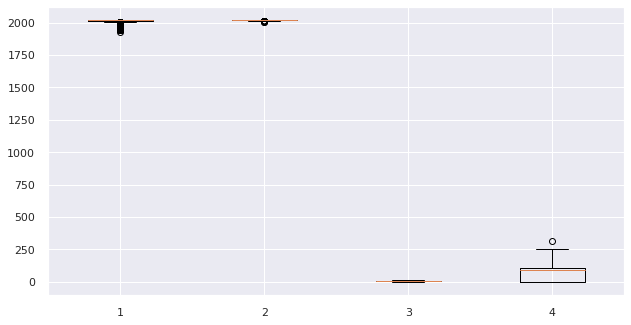

In [ ]:
# Handling Outliers & Outlier treatments
plot_data = [data['release_year'], data['year'], data['month'], data['duration']]
fig = plt.figure(figsize =(8, 4))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
bp = ax.boxplot(plot_data)
# show plot
plt.show()

In [ ]:
scaler = RobustScaler()
cleaned_data = scaler.fit_transform(plot_data)

##### What all outlier treatment techniques have you used and why did you use those techniques?

RobustScaler: We can use the RobustScaler from the scikit-learn library to scale the data in a way that is robust to outliers. The RobustScaler scales the data based on the interquartile range (IQR) instead of the mean and standard deviation, making it less sensitive to outliers.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
# Handling the data for Data Preprocessing
data.fillna('',inplace=True)

In [ ]:
# Combining all the clustering attributes into a single column

data['filtered_attributes'] = (data['director'] + ' ' + 
                                data['cast'] +' ' + 
                                data['country'] +' ' + 
                                data['listed_in'] +' ' + 
                                data['description'])

In [ ]:
data['filtered_attributes'][50]

"Roland Emmerich Steven Strait, Camilla Belle, Cliff Curtis, Joel Virgel, Affif Ben Badra, Mo Zinal, Nathanael Baring, Mona Hammond, Omar Sharif United States Action & Adventure Fierce mammoth hunter D'Leh sets out on an impossible journey to rescue the woman he loves from a vicious warlord and save the people of his village."

#### 1. Removing Non-ASCII Characters

In [ ]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [ ]:
# remove non-ascii characters
data['filtered_attributes'] = remove_non_ascii(data['filtered_attributes'])

In [ ]:
data['filtered_attributes'][50]

"Roland Emmerich Steven Strait, Camilla Belle, Cliff Curtis, Joel Virgel, Affif Ben Badra, Mo Zinal, Nathanael Baring, Mona Hammond, Omar Sharif United States Action & Adventure Fierce mammoth hunter D'Leh sets out on an impossible journey to rescue the woman he loves from a vicious warlord and save the people of his village."

#### 2. Lower Casing

In [ ]:
# Lower Casing
data['filtered_attributes' ]= data['filtered_attributes'].str.lower()

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)


In [ ]:
# remove non-ascii characters
data['filtered_attributes'] = data['filtered_attributes'].apply(remove_punctuation)

In [ ]:
data['filtered_attributes'][50]

'roland emmerich steven strait camilla belle cliff curtis joel virgel affif ben badra mo zinal nathanael baring mona hammond omar sharif united states action  adventure fierce mammoth hunter dleh sets out on an impossible journey to rescue the woman he loves from a vicious warlord and save the people of his village'

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# Removing stop words
data['filtered_attributes'] = data['filtered_attributes'].apply(stopwords)

In [ ]:
data['filtered_attributes'][50]

'roland emmerich steven strait camilla belle cliff curtis joel virgel affif ben badra mo zinal nathanael baring mona hammond omar sharif united states action adventure fierce mammoth hunter dleh sets impossible journey rescue woman loves vicious warlord save people village'

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization
tokenizer = TweetTokenizer()

In [ ]:
# remove non-ascii characters
data['filtered_attributes'] = (data['filtered_attributes']).apply(lambda x: tokenizer.tokenize(x))

In [ ]:
data['filtered_attributes'][50]

['roland',
 'emmerich',
 'steven',
 'strait',
 'camilla',
 'belle',
 'cliff',
 'curtis',
 'joel',
 'virgel',
 'affif',
 'ben',
 'badra',
 'mo',
 'zinal',
 'nathanael',
 'baring',
 'mona',
 'hammond',
 'omar',
 'sharif',
 'united',
 'states',
 'action',
 'adventure',
 'fierce',
 'mammoth',
 'hunter',
 'dleh',
 'sets',
 'impossible',
 'journey',
 'rescue',
 'woman',
 'loves',
 'vicious',
 'warlord',
 'save',
 'people',
 'village']

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
stemmer = SnowballStemmer('english')

In [ ]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [ ]:
data['filtered_attributes'] = data['filtered_attributes'].apply(lemmatize_verbs)

In [ ]:
data['filtered_attributes'][40]

['muharrem',
 'gulmez',
 'erdem',
 'yener',
 'ayhan',
 'tas',
 'emin',
 'olcay',
 'muharrem',
 'gulmez',
 'elif',
 'nur',
 'kerkuk',
 'tark',
 'papuccuoglu',
 'suzan',
 'aksoy',
 'doga',
 'konakoglu',
 'esin',
 'eden',
 'deniz',
 'ozerman',
 'turkey',
 'comedies',
 'slacker',
 'owner',
 'public',
 'bath',
 'house',
 'rally',
 'community',
 'save',
 'big',
 'developer',
 'come',
 'town',
 'close',
 'open',
 'new',
 'mall']

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
clustering_data = data['filtered_attributes']

In [ ]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
X = tfidf.fit_transform(clustering_data)

In [ ]:
X

<7777x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 224262 stored elements in Compressed Sparse Row format>

In [ ]:
#shape of X
X.shape

(7777, 20000)

In [ ]:
# converting X variable into array 
X = X.toarray()

##### Which text vectorization technique have you used and why?

TF-IDF vectorization technique is used to represent text data in a numerical form that can be easily processed by machine learning models. It helps to identify the most important words in a document and provides a way to quantify the similarity between documents based on their word content.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

At a certain point, more features or dimensions can decrease a model's accuracy since there is more data that needs to be generalized — this is known as the curse of dimensionality. Dimensionality reduction is way to reduce the complexity of a model and avoid overfitting.

In [ ]:
# DImensionality Reduction (If needed)
# using PCA to reduce dimensionality
pca = PCA()
pca.fit(X)

PCA()

Text(0, 0.5, 'cumulative explained variance')

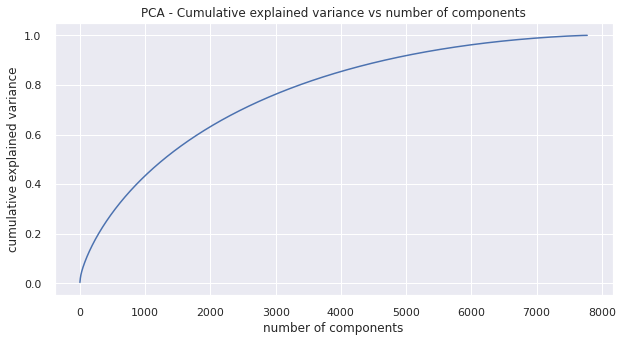

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We find that 100% of the variance is explained by about ~7500 components.
Also, more than 80% of the variance is explained just by 4000 components.
Hence to simplify the model, and reduce dimensionality, we can take the top 4000 components, which will still be able to capture more than 80% of variance.

In [ ]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=42)
pca.fit(X)

PCA(n_components=4000, random_state=42)

In [ ]:
# transformed features
x_pca = pca.transform(X)

In [ ]:
# shape of transformed vectors
x_pca.shape

(7777, 4000)

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=21), k=(4, 22),
                 metric='silhouette', timings=False)

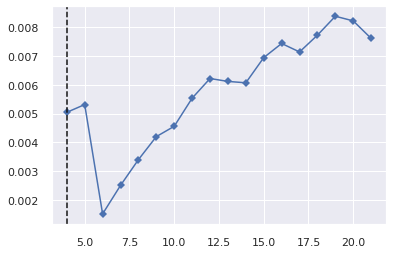

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm
#  # Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(4,22), metric='silhouette', timings=False
)
 
# Predict on the model
visualizer.fit(x_pca)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
silhouette_score(x_pca,kmeans.labels_)

0.004261243912736653

#### 2. Cross- Validation & Hyperparameter Tuning

Text(0, 0.5, 'WCSS')

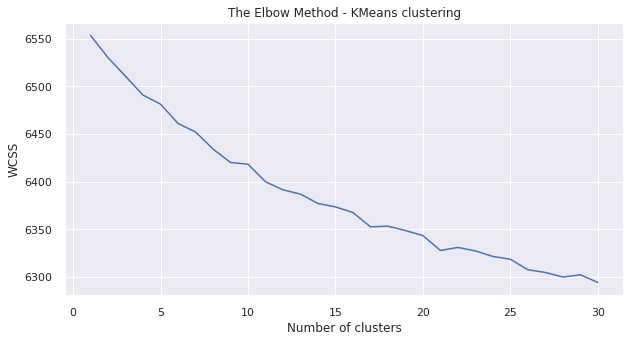

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Predict on the model

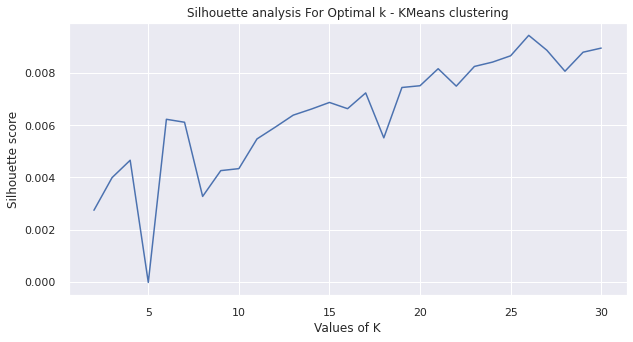

In [ ]:
# Plotting Silhouette score for different umber of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

From both methods Elbow and Silhouette we have choosen 9 as optimal clustering (K - value).

In [ ]:
# Clustering the data into 9 clusters
kmeans = KMeans(n_clusters=9,init='k-means++',random_state=33)
kmeans.fit(x_pca)

KMeans(n_clusters=9, random_state=33)

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(6420.2301719973275, 0.004261243912736653)


In [ ]:
#predict the labels of clusters.
label = kmeans.fit_predict(x_pca)

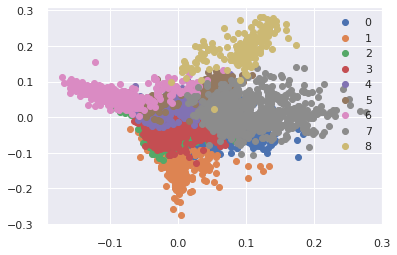

In [ ]:
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(x_pca[label == i , 0] , x_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
# Adding a kmeans cluster number attribute
data['kmeans_cluster'] = kmeans.labels_

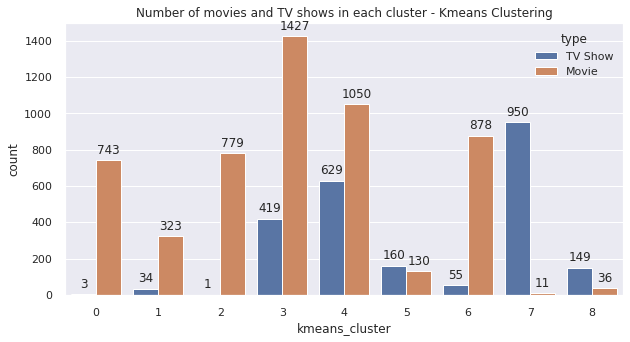

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=data, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

##### Which hyperparameter optimization technique have you used and why?

The sum of squared distance between each point and the centroid in a cluster (WCSS) decreases with the increase in the number of clusters.

Cluster wise analysis:

In [ ]:
# Building a wordcloud for the movie descriptions
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in data[data['kmeans_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image                      
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

Cluster 0: Documentries

In [ ]:
data[data['kmeans_cluster'] == 0][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]

In [ ]:
# Wordcloud for cluster 0
kmeans_worldcloud(0)

Cluster 1: Horror, Sports

In [ ]:
data[data['kmeans_cluster'] == 2][['type','title','director','cast','country','rating','listed_in','description']]

TypeError: ignored

In [ ]:
# Wordcloud for cluster 0
kmeans_worldcloud(1)

Cluster 2: Family Movies, Independent Movies

In [ ]:
data[data['kmeans_cluster'] == 2][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]

type                                title             director  \
2     Movie                                23:59         Gilbert Chan   
14    Movie                                 3022           John Suits   
19    Movie                                  '89              Unknown   
41    Movie                           Ég man þig  Óskar Thór Axelsson   
55    Movie  100 Things to do Before High School              Unknown   
...     ...                                  ...                  ...   
7761  Movie                               Zapped        Peter DeLuise   
7765  Movie                            Zero Hour     Robert O. Peters   
7772  Movie    Zipi & Zape y la Isla del Capitan         Oskar Santos   
7776  Movie                             Zokkomon     Satyajit Bhatkal   
7781  Movie                                 Zoom         Peter Hewitt   

                                                   cast         country  \
2     Tedd Chan, Stella Chung, Henley Hii, Lawrence ...       Singapore   
14    Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...   United States   
19                   Lee Dixon, Ian Wright, Paul Merson  United Kingdom   
41    Jóhannes Haukur Jóhannesson, Ágústa Eva Erlend...         Iceland   
55    Isabela Moner, Jaheem Toombs, Owen Joyner, Jac...   United States   
...                                                 ...             ...   
7761  Zendaya, Chanelle Peloso, Spencer Boldman, Emi...          Canada   
7765  Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, Rah...             nan   
7772  Teo Planell, Toni Gómez, Elena Anaya, Iria Cas...           Spain   
7776  Darsheel Safary, Anupam Kher, Manjari Fadnis, ...           India   
7781  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   United States   

          rating                 listed_in  \
2         Adults             Horror Movies   
14        Adults        Independent Movies   
19    Older Kids             Sports Movies   
41        Adults             Horror Movies   
55          Kids                    Movies   
...          ...                       ...   
7761        Kids  Children & Family Movies   
7765      Adults      International Movies   
7772  Older Kids  Children & Family Movies   
7776  Older Kids  Children & Family Movies   
7781  Older Kids  Children & Family Movies   

                                            description  
2     When an army recruit is found dead, his fellow...  
14    Stranded when the Earth is suddenly destroyed ...  
19    Mixing old footage with interviews, this is th...  
41    Young urbanites renovating a rundown house, an...  
55    Led by seventh-grader C.J., three students who...  
...                                                 ...  
7761  A girl discovers a dog-training app that can g...  
7765  After his father passes, the heir to a retail ...  
7772  At Christmas, Zip and Zap take a trip with the...  
7776  When his cruel uncle abandons him, a young orp...  
7781  Dragged from civilian life, a former superhero...  

[780 rows x 8 columns]

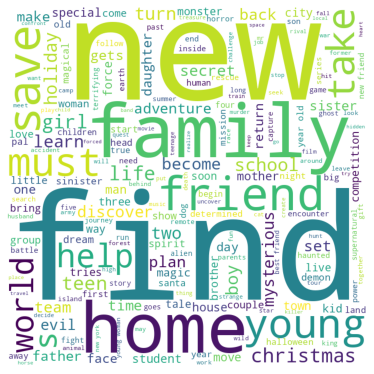

In [ ]:

# Wordcloud for cluster 0
kmeans_worldcloud(2)

Cluster 3: Dramas, Comedies

In [ ]:
data[data['kmeans_cluster'] == 3][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]

type                       title         director  \
3       Movie                           9      Shane Acker   
4       Movie                          21   Robert Luketic   
7       Movie                         187   Kevin Reynolds   
10      Movie                        1922     Zak Hilditch   
29    TV Show                    #blackAF          Unknown   
...       ...                         ...              ...   
7755  TV Show                    Z Nation          Unknown   
7758    Movie  Zack and Miri Make a Porno      Kevin Smith   
7759  TV Show                   Zak Storm          Unknown   
7774    Movie                      Zodiac    David Fincher   
7778    Movie                  Zombieland  Ruben Fleischer   

                                                   cast        country  \
3     Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4     Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
7     Samuel L. Jackson, John Heard, Kelly Rowan, Cl...  United States   
10    Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...  United States   
29    Kenya Barris, Rashida Jones, Iman Benson, Genn...  United States   
...                                                 ...            ...   
7755  Nat Zang, Russell Hodgkinson, Michael Welch, A...  United States   
7758  Seth Rogen, Elizabeth Banks, Craig Robinson, J...  United States   
7759  Michael Johnston, Jessica Gee-George, Christin...  United States   
7774  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
7778  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   

          rating              listed_in  \
3          Teens     Action & Adventure   
4          Teens                 Dramas   
7         Adults                 Dramas   
10        Adults                 Dramas   
29        Adults            TV Comedies   
...          ...                    ...   
7755      Adults  TV Action & Adventure   
7758      Adults               Comedies   
7759  Older Kids               Kids' TV   
7774      Adults            Cult Movies   
7778      Adults               Comedies   

                                            description  
3     In a postapocalyptic world, rag-doll robots hi...  
4     A brilliant group of students become card-coun...  
7     After one of his high school students attacks ...  
10    A farmer pens a confession admitting to his wi...  
29    Kenya Barris and his family navigate relations...  
...                                                 ...  
7755  A team embarks on a perilous cross-country mis...  
7758  Zack and Miri make and star in an adult film t...  
7759  Teen surfer Zak Storm is mysteriously transpor...  
7774  A political cartoonist, a crime reporter and a...  
7778  Looking to survive in a world taken over by zo...  

[1846 rows x 8 columns]

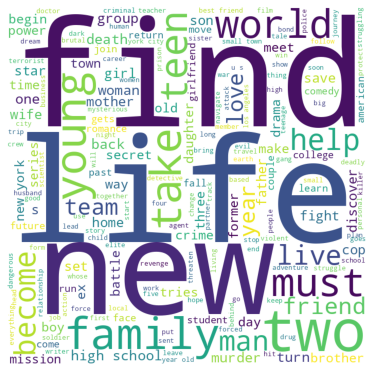

In [ ]:

# Wordcloud for cluster 0
kmeans_worldcloud(3)

Cluster 4: Crime, Anime shows

In [ ]:
data[data['kmeans_cluster'] == 4][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]

type               title           director  \
0     TV Show                  3%            Unknown   
1       Movie                7:19  Jorge Michel Grau   
5     TV Show                  46        Serdar Akar   
6       Movie                 122    Yasir Al Yasiri   
11    TV Show                1983            Unknown   
...       ...                 ...                ...   
7767  TV Show  Zindagi Gulzar Hai            Unknown   
7770    Movie             Zinzana    Majid Al Ansari   
7775  TV Show          Zoids Wild            Unknown   
7779  TV Show           Zona Rosa            Unknown   
7782    Movie                Zozo        Josef Fares   

                                                   cast               country  \
0     João Miguel, Bianca Comparato, Michel Gomes, R...                Brazil   
1     Demián Bichir, Héctor Bonilla, Oscar Serrano, ...                Mexico   
5     Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...                Turkey   
6     Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...                 Egypt   
11    Robert Więckiewicz, Maciej Musiał, Michalina O...                Poland   
...                                                 ...                   ...   
7767  Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...              Pakistan   
7770  Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...  United Arab Emirates   
7775  Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...                 Japan   
7779  Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...                Mexico   
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...                Sweden   

          rating               listed_in  \
0         Adults  International TV Shows   
1         Adults                  Dramas   
5         Adults  International TV Shows   
6         Adults           Horror Movies   
11        Adults          Crime TV Shows   
...          ...                     ...   
7767  Older Kids  International TV Shows   
7770      Adults                  Dramas   
7775  Older Kids            Anime Series   
7779      Adults  International TV Shows   
7782      Adults                  Dramas   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devastating earthquake hits Mexico Cit...  
5     A genetics professor experiments with a treatm...  
6     After an awful accident, a couple admitted to ...  
11    In this dark alt-history thriller, a naïve law...  
...                                                 ...  
7767  Strong-willed, middle-class Kashaf and carefre...  
7770  Recovering alcoholic Talal wakes up inside a s...  
7775  A quest for freedom and legendary treasure beg...  
7779  An assortment of talent takes the stage for a ...  
7782  When Lebanon's Civil War deprives Zozo of his ...  

[1679 rows x 8 columns]

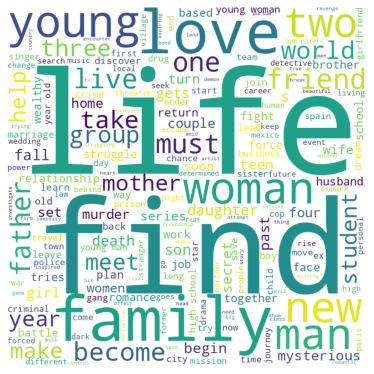

In [ ]:

# Wordcloud for cluster 0
kmeans_worldcloud(4)

Cluster 5: Action & Adventure, International TV shows

In [ ]:
data[data['kmeans_cluster'] == 5][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]

type                      title              director  \
68      Movie                  14 Blades            Daniel Lee   
149     Movie           A Beautiful Life  Andrew Lau Wai-Keung   
152   TV Show         A Boy Name Flora A               Unknown   
157     Movie                     A Choo   Kevin Ko, Peter Tsi   
180   TV Show                A Good Wife               Unknown   
...       ...                        ...                   ...   
7709  TV Show                Yes We Can!               Unknown   
7733  TV Show          You're My Destiny               Unknown   
7737    Movie                Young Tiger                Mu Chu   
7741    Movie  Your Name Engraved Herein         Liu Kuang-hui   
7743  TV Show            Yours Fatefully               Unknown   

                                                   cast    country  \
68    Donnie Yen, Zhao Wei, Wu Chun, Law Kar-Ying, K...  Hong Kong   
149   Qi Shu, Liu Ye, Anthony Wong Chau-Sang, Liang ...      China   
152   Crowd Lu, Tsai Chen-nan, Lotus Wang, Fan Chu-M...     Taiwan   
157   Kai Ko, Ariel Lin, Darren Wang, Zhang Xiaolong...     Taiwan   
180   Tien Hsin, Christopher Lee, Darren Chiu, Shara...     Taiwan   
...                                                 ...        ...   
7709  Romeo Tan, Rebecca Lim, Sora Ma, Xu Bin, Chen ...  Singapore   
7733  Joe Chen, Ethan Juan, Baron Chen, Bianca Bai, ...     Taiwan   
7737  Qiu Yuen, Charlie Chin, Jackie Chan, Hu Chin, ...  Hong Kong   
7741  Edward Chen, Tseng Ching-hua, Leon Dai, Jason ...     Taiwan   
7743  Kingone Wang, Jesseca Liu, Xiang Yun, Chen Shu...  Singapore   

            rating               listed_in  \
68          Adults      Action & Adventure   
149   Young Adults                  Dramas   
152         Adults  International TV Shows   
157   Young Adults      Action & Adventure   
180   Young Adults  International TV Shows   
...            ...                     ...   
7709  Young Adults  International TV Shows   
7733        Adults  International TV Shows   
7737        Adults      Action & Adventure   
7741        Adults                  Dramas   
7743  Young Adults  International TV Shows   

                                            description  
68    In the age of the Ming Dynasty, Quinglong is t...  
149   After meeting under awkward circumstances, a g...  
152   A 28-year-old layabout begins to re-examine hi...  
157   Determined to win the heart of his childhood c...  
180   As her seemingly idyllic life begins to crumbl...  
...                                                 ...  
7709  When a frustrated businessman starts his own f...  
7733  A young woman's romantic cruise ends in a twis...  
7737  Aided only by a tough female police officer, a...  
7741  In 1987, as martial law ends in Taiwan, Jia-ha...  
7743  Two lonely singles meet on a blind date and sl...  

[290 rows x 8 columns]

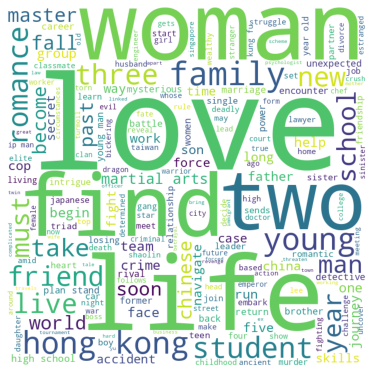

In [ ]:

# Wordcloud for cluster 0
kmeans_worldcloud(5)

Cluster 6: India, Life

In [ ]:
data[data['kmeans_cluster'] == 6][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]

type                     title            director  \
8     Movie                       706       Shravan Kumar   
9     Movie                      1920        Vikram Bhatt   
18    Movie                    15-Aug  Swapnaneel Jayakar   
20    Movie      ​​Kuch Bheege Alfaaz                Onir   
21    Movie              ​Goli Soda 2        Vijay Milton   
...     ...                       ...                 ...   
7764  Movie                      Zero          Aanand Rai   
7768  Movie  Zindagi Kitni Haseen Hay       Anjum Shahzad   
7769  Movie  Zindagi Na Milegi Dobara         Zoya Akhtar   
7780  Movie                       Zoo        Shlok Sharma   
7783  Movie                    Zubaan         Mozez Singh   

                                                   cast   country  \
8     Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...     India   
9     Rajneesh Duggal, Adah Sharma, Indraneil Sengup...     India   
18    Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...     India   
20    Geetanjali Thapa, Zain Khan Durrani, Shray Rai...     India   
21    Samuthirakani, Bharath Seeni, Vinoth, Esakki B...     India   
...                                                 ...       ...   
7764  Shah Rukh Khan, Anushka Sharma, Katrina Kaif, ...     India   
7768  Feroze Khan, Sajal Ali, Jibrayl Ahmed Rajput, ...  Pakistan   
7769  Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...     India   
7780  Shashank Arora, Shweta Tripathi, Rahul Kumar, ...     India   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...     India   

            rating           listed_in  \
8     Young Adults       Horror Movies   
9           Adults       Horror Movies   
18    Young Adults            Comedies   
20    Young Adults              Dramas   
21    Young Adults  Action & Adventure   
...            ...                 ...   
7764  Young Adults            Comedies   
7768  Young Adults              Dramas   
7769  Young Adults            Comedies   
7780        Adults              Dramas   
7783  Young Adults              Dramas   

                                            description  
8     When a doctor goes missing, his psychiatrist w...  
9     An architect and his wife move into a castle t...  
18    On India's Independence Day, a zany mishap in ...  
20    After accidentally connecting over the Interne...  
21    A taxi driver, a gangster and an athlete strug...  
...                                                 ...  
7764  Through his relationships with two wildly diff...  
7768  Two young parents struggle to keep their marri...  
7769  Three friends on an adventurous road trip/bach...  
7780  A drug dealer starts having doubts about his t...  
7783  A scrappy but poor boy worms his way into a ty...  

[933 rows x 8 columns]

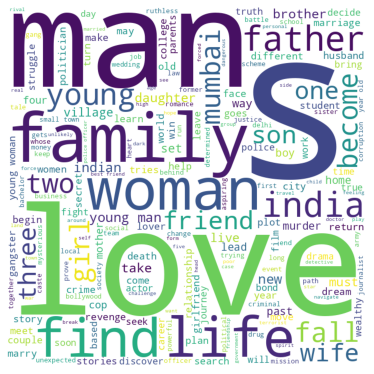

In [ ]:

# Wordcloud for cluster 0
kmeans_worldcloud(6)

Cluster 7: Reality TV shows, Series

In [ ]:
data[data['kmeans_cluster'] == 7][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]

type                  title              director  \
12    TV Show                   1994  Diego Enrique Osorno   
26    TV Show               (Un)Well               Unknown   
53    TV Show             100 Humans               Unknown   
58    TV Show            100% Hotter               Unknown   
85    TV Show               21 Again               Unknown   
...       ...                    ...                   ...   
7730  TV Show           You vs. Wild               Unknown   
7738  TV Show        Young Wallander               Unknown   
7766  TV Show           Zig & Sharko               Unknown   
7777  TV Show            Zombie Dumb               Unknown   
7785  TV Show  Zumbo's Just Desserts               Unknown   

                                                   cast         country  \
12                                              Unknown          Mexico   
26                                              Unknown   United States   
53               Zainab Johnson, Sammy Obeid, Alie Ward   United States   
58    Daniel Palmer, Melissa Sophia, Karen Williams,...  United Kingdom   
85                                         Laura Morgan  United Kingdom   
...                                                 ...             ...   
7730                                        Bear Grylls   United States   
7738  Adam Pålsson, Richard Dillane, Leanne Best, El...  United Kingdom   
7766                                            Unknown          France   
7777                                            Unknown             nan   
7785                         Adriano Zumbo, Rachel Khoo       Australia   

            rating               listed_in  \
12          Adults          Crime TV Shows   
26          Adults              Reality TV   
53    Young Adults              Docuseries   
58    Young Adults        British TV Shows   
85          Adults        British TV Shows   
...            ...                     ...   
7730    Older Kids                Kids' TV   
7738        Adults          Crime TV Shows   
7766    Older Kids                Kids' TV   
7777    Older Kids                Kids' TV   
7785    Older Kids  International TV Shows   

                                            description  
12    Archival video and new interviews examine Mexi...  
26    This docuseries takes a deep dive into the luc...  
53    One hundred hardy souls from diverse backgroun...  
58    A stylist, a hair designer and a makeup artist...  
85    In a social experiment, a group of daughters s...  
...                                                 ...  
7730  In this interactive series, you'll make key de...  
7738  An incendiary hate crime stirs civil unrest, f...  
7766  Zig, an island-bound hyena, will do anything t...  
7777  While living alone in a spooky town, a young g...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  

[961 rows x 8 columns]

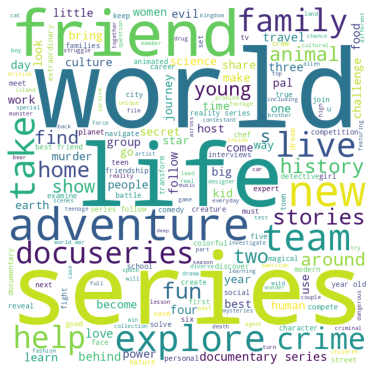

In [ ]:

# Wordcloud for cluster 0
kmeans_worldcloud(7)

Cluster 8: South Korea Shows and movies

In [ ]:
data[data['kmeans_cluster'] == 8][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]

type                        title       director  \
27      Movie                       #Alive         Cho Il   
51    TV Show           100 Days My Prince        Unknown   
61    TV Show             12 Years Promise        Unknown   
91      Movie                     26 Years  Geun-hyun Cho   
95    TV Show                     28 Moons        Unknown   
...       ...                          ...            ...   
7551    Movie    What Happened to Mr. Cha?   Kim Dong-kyu   
7555  TV Show  What in the World Happened?        Unknown   
7583  TV Show     When the Camellia Blooms        Unknown   
7601  TV Show                 White Nights        Unknown   
7711  TV Show    YG Future Strategy Office        Unknown   

                                                   cast      country  \
27                             Yoo Ah-in, Park Shin-hye  South Korea   
51    Doh Kyung-soo, Nam Ji-hyun, Cho Seong-ha, Cho ...  South Korea   
61    So-yeon Lee, Namkoong Min, Tae-im Lee, So-hui ...  South Korea   
91    Goo Jin, Hye-jin Han, Soo-bin Bae, Seul-ong Im...  South Korea   
95    Jin-sung Yang, Kyu-jong Kim, Tae-hwan Kang, Ge...  South Korea   
...                                                 ...          ...   
7551           Cha In-pyo, Cho Dal-hwan, Song Jae-ryong  South Korea   
7555  Eun-mi Go, Jaehyo, Eun-Hyung Jo, Ha-yeon Kim, ...  South Korea   
7583  Kong Hyo-jin, Kang Ha-neul, Kim Ji-seok, Oh Ju...  South Korea   
7601  Yo-Won Lee, Goo Jin, U-ie, Hae-in Jung, Gook-h...  South Korea   
7711  Seungri, Yoo Byung Jae, Lee Jai-jin, Jinu, Son...  South Korea   

            rating               listed_in  \
27          Adults           Horror Movies   
51    Young Adults  International TV Shows   
61    Young Adults  International TV Shows   
91          Adults                  Dramas   
95      Older Kids  International TV Shows   
...            ...                     ...   
7551        Adults                Comedies   
7555  Young Adults  International TV Shows   
7583  Young Adults  International TV Shows   
7601  Young Adults  International TV Shows   
7711        Adults  International TV Shows   

                                            description  
27    As a grisly virus rampages a city, a lone man ...  
51    Upon losing his memory, a crown prince encount...  
61    A pregnant teen is forced by her family to lea...  
91    Twenty-six years after the 1980 massacre at Gw...  
95    When her fiancé acts strangely upon receiving ...  
...                                                 ...  
7551  With the peak of his career long behind him, a...  
7555  A happy secret romance between a 40-year-old w...  
7583  Dongbaek is a single mother. When a potential ...  
7601  A coldhearted heiress, a man from her past and...  
7711  K-pop star Seungri, BIGBANG's youngest member,...  

[185 rows x 8 columns]

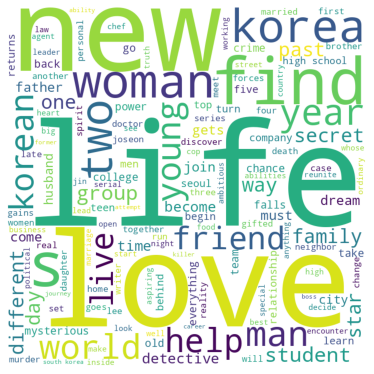

In [ ]:

# Wordcloud for cluster 
kmeans_worldcloud(8)

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

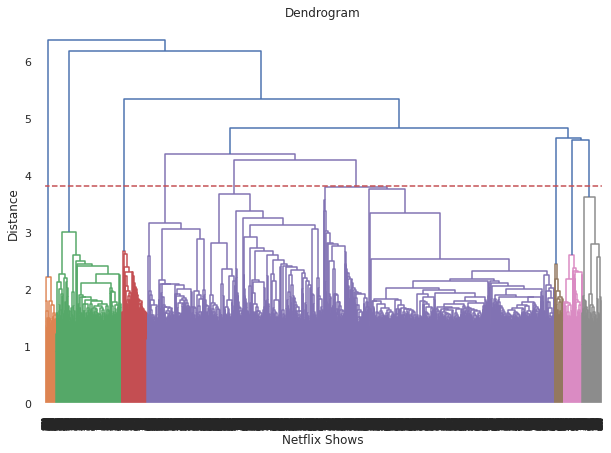

In [ ]:
# Visualizing evaluation Metric Score chart
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(10, 7))  
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

At distance of 3.8 units, 9 clusters can be built using Agglomeration Clustering algorithm.

In [ ]:
#Hirarchical model implementation
hierarchical = AgglomerativeClustering(n_clusters = 9, affinity= 'euclidean', linkage = 'ward')
hierarchical.fit_predict(x_pca)

array([1, 1, 3, ..., 8, 8, 8])

In [ ]:
# Adding a kmeans cluster number attribute
data['hierarchical_cluster'] = hierarchical.labels_

In [ ]:
#Evaluation metrics
print(silhouette_score(x_pca, hierarchical.labels_))

0.0015739232384320242


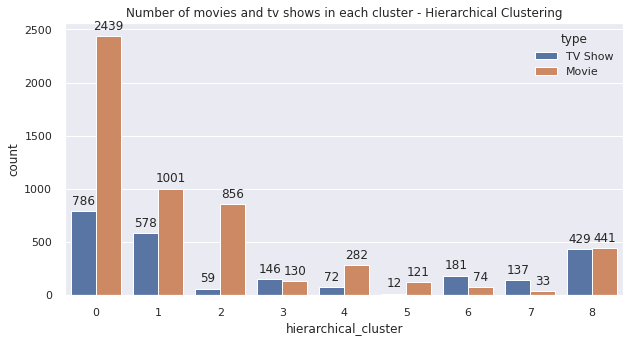

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=data, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in data[data['hierarchical_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image                      
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

In [ ]:
data[data['kmeans_cluster'] == 6][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]

type                     title            director  \
8     Movie                       706       Shravan Kumar   
9     Movie                      1920        Vikram Bhatt   
18    Movie                    15-Aug  Swapnaneel Jayakar   
20    Movie      ​​Kuch Bheege Alfaaz                Onir   
21    Movie              ​Goli Soda 2        Vijay Milton   
...     ...                       ...                 ...   
7764  Movie                      Zero          Aanand Rai   
7768  Movie  Zindagi Kitni Haseen Hay       Anjum Shahzad   
7769  Movie  Zindagi Na Milegi Dobara         Zoya Akhtar   
7780  Movie                       Zoo        Shlok Sharma   
7783  Movie                    Zubaan         Mozez Singh   

                                                   cast   country  \
8     Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...     India   
9     Rajneesh Duggal, Adah Sharma, Indraneil Sengup...     India   
18    Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...     India   
20    Geetanjali Thapa, Zain Khan Durrani, Shray Rai...     India   
21    Samuthirakani, Bharath Seeni, Vinoth, Esakki B...     India   
...                                                 ...       ...   
7764  Shah Rukh Khan, Anushka Sharma, Katrina Kaif, ...     India   
7768  Feroze Khan, Sajal Ali, Jibrayl Ahmed Rajput, ...  Pakistan   
7769  Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...     India   
7780  Shashank Arora, Shweta Tripathi, Rahul Kumar, ...     India   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...     India   

            rating           listed_in  \
8     Young Adults       Horror Movies   
9           Adults       Horror Movies   
18    Young Adults            Comedies   
20    Young Adults              Dramas   
21    Young Adults  Action & Adventure   
...            ...                 ...   
7764  Young Adults            Comedies   
7768  Young Adults              Dramas   
7769  Young Adults            Comedies   
7780        Adults              Dramas   
7783  Young Adults              Dramas   

                                            description  
8     When a doctor goes missing, his psychiatrist w...  
9     An architect and his wife move into a castle t...  
18    On India's Independence Day, a zany mishap in ...  
20    After accidentally connecting over the Interne...  
21    A taxi driver, a gangster and an athlete strug...  
...                                                 ...  
7764  Through his relationships with two wildly diff...  
7768  Two young parents struggle to keep their marri...  
7769  Three friends on an adventurous road trip/bach...  
7780  A drug dealer starts having doubts about his t...  
7783  A scrappy but poor boy worms his way into a ty...  

[933 rows x 8 columns]

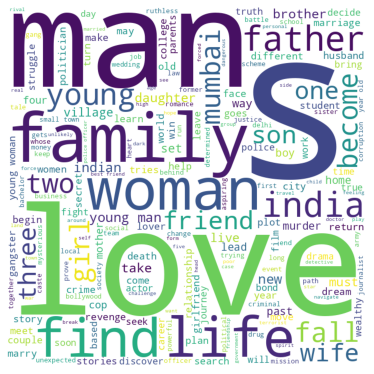

In [ ]:

# Wordcloud for cluster 0
kmeans_worldcloud(6)

In [ ]:
data[data['hierarchical_cluster'] == 0][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]

type        title         director  \
3       Movie            9      Shane Acker   
4       Movie           21   Robert Luketic   
7       Movie          187   Kevin Reynolds   
8       Movie          706    Shravan Kumar   
10      Movie         1922     Zak Hilditch   
...       ...          ...              ...   
7771    Movie         Zion       Floyd Russ   
7774    Movie       Zodiac    David Fincher   
7777  TV Show  Zombie Dumb          Unknown   
7778    Movie   Zombieland  Ruben Fleischer   
7781    Movie         Zoom     Peter Hewitt   

                                                   cast        country  \
3     Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4     Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
7     Samuel L. Jackson, John Heard, Kelly Rowan, Cl...  United States   
8     Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...          India   
10    Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...  United States   
...                                                 ...            ...   
7771                                         Zion Clark  United States   
7774  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
7777                                            Unknown            nan   
7778  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
7781  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   

            rating                 listed_in  \
3            Teens        Action & Adventure   
4            Teens                    Dramas   
7           Adults                    Dramas   
8     Young Adults             Horror Movies   
10          Adults                    Dramas   
...            ...                       ...   
7771    Older Kids             Documentaries   
7774        Adults               Cult Movies   
7777    Older Kids                  Kids' TV   
7778        Adults                  Comedies   
7781    Older Kids  Children & Family Movies   

                                            description  
3     In a postapocalyptic world, rag-doll robots hi...  
4     A brilliant group of students become card-coun...  
7     After one of his high school students attacks ...  
8     When a doctor goes missing, his psychiatrist w...  
10    A farmer pens a confession admitting to his wi...  
...                                                 ...  
7771  Born without legs and stuck in foster care for...  
7774  A political cartoonist, a crime reporter and a...  
7777  While living alone in a spooky town, a young g...  
7778  Looking to survive in a world taken over by zo...  
7781  Dragged from civilian life, a former superhero...  

[3225 rows x 8 columns]

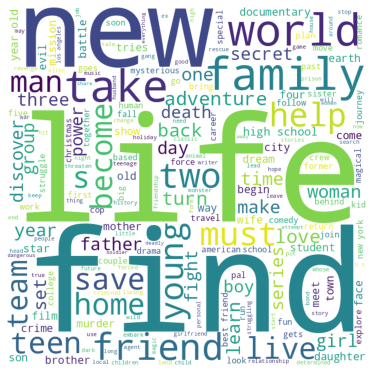

In [ ]:

# Wordcloud for cluster 
hierarchical_worldcloud(0)

In [ ]:
data[data['hierarchical_cluster'] == 1][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]

type                              title  \
0     TV Show                                 3%   
1       Movie                               7:19   
5     TV Show                                 46   
11    TV Show                               1983   
12    TV Show                               1994   
...       ...                                ...   
7768    Movie           Zindagi Kitni Haseen Hay   
7770    Movie                            Zinzana   
7772    Movie  Zipi & Zape y la Isla del Capitan   
7773    Movie                     Zoé: Panoramas   
7782    Movie                               Zozo   

                                   director  \
0                                   Unknown   
1                         Jorge Michel Grau   
5                               Serdar Akar   
11                                  Unknown   
12                     Diego Enrique Osorno   
...                                     ...   
7768                          Anjum Shahzad   
7770                        Majid Al Ansari   
7772                           Oskar Santos   
7773  Rodrigo Guardiola, Gabriel Cruz Rivas   
7782                            Josef Fares   

                                                   cast               country  \
0     João Miguel, Bianca Comparato, Michel Gomes, R...                Brazil   
1     Demián Bichir, Héctor Bonilla, Oscar Serrano, ...                Mexico   
5     Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...                Turkey   
11    Robert Więckiewicz, Maciej Musiał, Michalina O...                Poland   
12                                              Unknown                Mexico   
...                                                 ...                   ...   
7768  Feroze Khan, Sajal Ali, Jibrayl Ahmed Rajput, ...              Pakistan   
7770  Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...  United Arab Emirates   
7772  Teo Planell, Toni Gómez, Elena Anaya, Iria Cas...                 Spain   
7773  Sergio Acosta, Jesús Báez, Ángel Mosqueda, Rod...                Mexico   
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...                Sweden   

            rating                 listed_in  \
0           Adults    International TV Shows   
1           Adults                    Dramas   
5           Adults    International TV Shows   
11          Adults            Crime TV Shows   
12          Adults            Crime TV Shows   
...            ...                       ...   
7768  Young Adults                    Dramas   
7770        Adults                    Dramas   
7772    Older Kids  Children & Family Movies   
7773        Adults             Documentaries   
7782        Adults                    Dramas   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devastating earthquake hits Mexico Cit...  
5     A genetics professor experiments with a treatm...  
11    In this dark alt-history thriller, a naïve law...  
12    Archival video and new interviews examine Mexi...  
...                                                 ...  
7768  Two young parents struggle to keep their marri...  
7770  Recovering alcoholic Talal wakes up inside a s...  
7772  At Christmas, Zip and Zap take a trip with the...  
7773  This introspective rockumentary follows the ca...  
7782  When Lebanon's Civil War deprives Zozo of his ...  

[1579 rows x 8 columns]

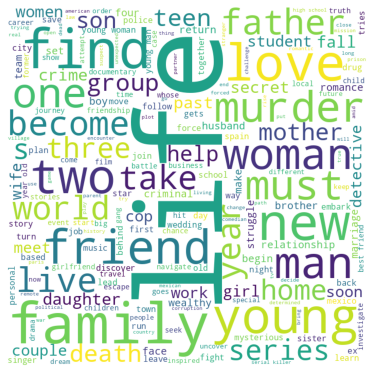

In [ ]:

# Wordcloud for cluster 
hierarchical_worldcloud(1)

In [ ]:
data[data['hierarchical_cluster'] == 2][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]

type                     title            director  \
9     Movie                      1920        Vikram Bhatt   
18    Movie                    15-Aug  Swapnaneel Jayakar   
20    Movie      ​​Kuch Bheege Alfaaz                Onir   
21    Movie              ​Goli Soda 2        Vijay Milton   
22    Movie        ​Maj Rati ​​Keteki   Santwana Bardoloi   
...     ...                       ...                 ...   
7764  Movie                      Zero          Aanand Rai   
7769  Movie  Zindagi Na Milegi Dobara         Zoya Akhtar   
7776  Movie                  Zokkomon    Satyajit Bhatkal   
7780  Movie                       Zoo        Shlok Sharma   
7783  Movie                    Zubaan         Mozez Singh   

                                                   cast country        rating  \
9     Rajneesh Duggal, Adah Sharma, Indraneil Sengup...   India        Adults   
18    Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...   India  Young Adults   
20    Geetanjali Thapa, Zain Khan Durrani, Shray Rai...   India  Young Adults   
21    Samuthirakani, Bharath Seeni, Vinoth, Esakki B...   India  Young Adults   
22    Adil Hussain, Shakil Imtiaz, Mahendra Rabha, S...   India  Young Adults   
...                                                 ...     ...           ...   
7764  Shah Rukh Khan, Anushka Sharma, Katrina Kaif, ...   India  Young Adults   
7769  Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...   India  Young Adults   
7776  Darsheel Safary, Anupam Kher, Manjari Fadnis, ...   India    Older Kids   
7780  Shashank Arora, Shweta Tripathi, Rahul Kumar, ...   India        Adults   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   India  Young Adults   

                     listed_in  \
9                Horror Movies   
18                    Comedies   
20                      Dramas   
21          Action & Adventure   
22                      Dramas   
...                        ...   
7764                  Comedies   
7769                  Comedies   
7776  Children & Family Movies   
7780                    Dramas   
7783                    Dramas   

                                            description  
9     An architect and his wife move into a castle t...  
18    On India's Independence Day, a zany mishap in ...  
20    After accidentally connecting over the Interne...  
21    A taxi driver, a gangster and an athlete strug...  
22    A successful writer returns to the town that l...  
...                                                 ...  
7764  Through his relationships with two wildly diff...  
7769  Three friends on an adventurous road trip/bach...  
7776  When his cruel uncle abandons him, a young orp...  
7780  A drug dealer starts having doubts about his t...  
7783  A scrappy but poor boy worms his way into a ty...  

[915 rows x 8 columns]

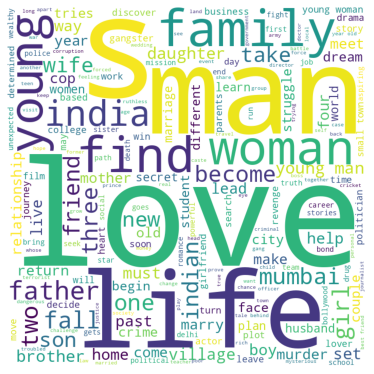

In [ ]:

# Wordcloud for cluster 
hierarchical_worldcloud(2)

In [ ]:
data[data['hierarchical_cluster'] == 3][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]

type                      title              director  \
2       Movie                      23:59          Gilbert Chan   
68      Movie                  14 Blades            Daniel Lee   
149     Movie           A Beautiful Life  Andrew Lau Wai-Keung   
152   TV Show         A Boy Name Flora A               Unknown   
157     Movie                     A Choo   Kevin Ko, Peter Tsi   
...       ...                        ...                   ...   
7709  TV Show                Yes We Can!               Unknown   
7733  TV Show          You're My Destiny               Unknown   
7737    Movie                Young Tiger                Mu Chu   
7741    Movie  Your Name Engraved Herein         Liu Kuang-hui   
7743  TV Show            Yours Fatefully               Unknown   

                                                   cast    country  \
2     Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore   
68    Donnie Yen, Zhao Wei, Wu Chun, Law Kar-Ying, K...  Hong Kong   
149   Qi Shu, Liu Ye, Anthony Wong Chau-Sang, Liang ...      China   
152   Crowd Lu, Tsai Chen-nan, Lotus Wang, Fan Chu-M...     Taiwan   
157   Kai Ko, Ariel Lin, Darren Wang, Zhang Xiaolong...     Taiwan   
...                                                 ...        ...   
7709  Romeo Tan, Rebecca Lim, Sora Ma, Xu Bin, Chen ...  Singapore   
7733  Joe Chen, Ethan Juan, Baron Chen, Bianca Bai, ...     Taiwan   
7737  Qiu Yuen, Charlie Chin, Jackie Chan, Hu Chin, ...  Hong Kong   
7741  Edward Chen, Tseng Ching-hua, Leon Dai, Jason ...     Taiwan   
7743  Kingone Wang, Jesseca Liu, Xiang Yun, Chen Shu...  Singapore   

            rating               listed_in  \
2           Adults           Horror Movies   
68          Adults      Action & Adventure   
149   Young Adults                  Dramas   
152         Adults  International TV Shows   
157   Young Adults      Action & Adventure   
...            ...                     ...   
7709  Young Adults  International TV Shows   
7733        Adults  International TV Shows   
7737        Adults      Action & Adventure   
7741        Adults                  Dramas   
7743  Young Adults  International TV Shows   

                                            description  
2     When an army recruit is found dead, his fellow...  
68    In the age of the Ming Dynasty, Quinglong is t...  
149   After meeting under awkward circumstances, a g...  
152   A 28-year-old layabout begins to re-examine hi...  
157   Determined to win the heart of his childhood c...  
...                                                 ...  
7709  When a frustrated businessman starts his own f...  
7733  A young woman's romantic cruise ends in a twis...  
7737  Aided only by a tough female police officer, a...  
7741  In 1987, as martial law ends in Taiwan, Jia-ha...  
7743  Two lonely singles meet on a blind date and sl...  

[276 rows x 8 columns]

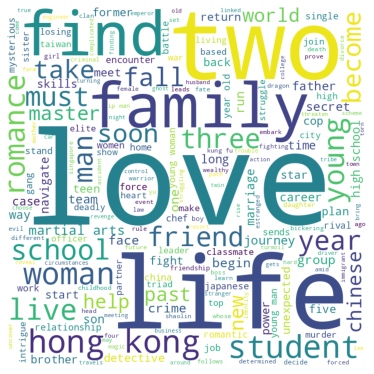

In [ ]:

# Wordcloud for cluster 
hierarchical_worldcloud(3)

In [ ]:
data[data['hierarchical_cluster'] == 4][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]

type                                        title  \
29    TV Show                                     #blackAF   
192     Movie                              A Land Imagined   
220     Movie                   A Russell Peters Christmas   
257     Movie                                A Yellow Bird   
259   TV Show                      A.D. Kingdom and Empire   
...       ...                                          ...   
7604    Movie                 Whitney Cummings: Money Shot   
7656    Movie                Wonho Chung: Live in New York   
7662    Movie                                      Work It   
7757    Movie  Zach Galifianakis: Live at the Purple Onion   
7779  TV Show                                    Zona Rosa   

                director                                               cast  \
29               Unknown  Kenya Barris, Rashida Jones, Iman Benson, Genn...   
192         Yeo Siew Hua  Peter Yu, Liu Xiaoyi, Guo Yue, Ishtiaque Zico,...   
220   Henry Sarwer-Foner  Russell Peters, Pamela Anderson, Michael Bublé...   
257         K. Rajagopal  Sivakumar Palakrishnan, Huang Lu, Seema Biswas...   
259              Unknown  Juan Pablo Di Pace, Adam Levy, Chipo Chung, Ba...   
...                  ...                                                ...   
7604    John Fortenberry                                   Whitney Cummings   
7656           Shaun Mir                                        Wonho Chung   
7662       Laura Terruso  Sabrina Carpenter, Jordan Fisher, Liza Koshy, ...   
7757     Michael Blieden                     Zach Galifianakis, Brian Unger   
7779             Unknown  Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...   

            country        rating               listed_in  \
29    United States        Adults             TV Comedies   
192          France        Adults                  Dramas   
220          Canada        Adults         Stand-Up Comedy   
257       Singapore        Adults                  Dramas   
259   United States  Young Adults               TV Dramas   
...             ...           ...                     ...   
7604  United States        Adults         Stand-Up Comedy   
7656            nan  Young Adults         Stand-Up Comedy   
7662  United States  Young Adults                Comedies   
7757  United States        Adults         Stand-Up Comedy   
7779         Mexico        Adults  International TV Shows   

                                            description  
29    Kenya Barris and his family navigate relations...  
192   A cop in Singapore investigates the disappeara...  
220   Inspired by the variety shows of the 1970s, "A...  
257   In Singapore, a homeless ex-convict hoping to ...  
259   In the wake of Jesus Christ's crucifixion, his...  
...                                                 ...  
7604  Comedy Central roast veteran Whitney Cummings ...  
7656  At the Comic Strip's first Arabic stand-up sho...  
7662  A brilliant but clumsy high school senior vows...  
7757  The unorthodox, piano-playing stand-up star Za...  
7779  An assortment of talent takes the stage for a ...  

[354 rows x 8 columns]

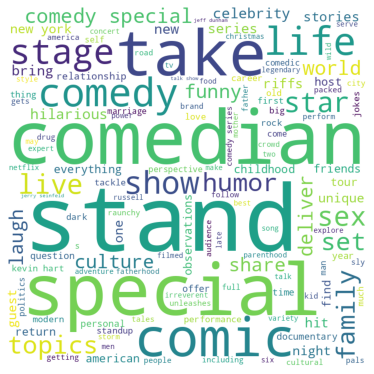

In [ ]:

# Wordcloud for cluster 
hierarchical_worldcloud(4)

In [ ]:
data[data['hierarchical_cluster'] == 5][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]

type                      title           director  \
6     Movie                        122    Yasir Al Yasiri   
103   Movie          30 Days of Luxury         Hani Hamdi   
204   Movie  A Mission in an Old Movie     Ahmad El-Badri   
280   Movie                  Abdo Mota            Unknown   
381   Movie        Alexandria ... Why?    Youssef Chahine   
...     ...                        ...                ...   
7683  Movie                    X Large       Sherif Arafa   
7700  Movie                  يوم الدين    Abu Bakr Shawky   
7747  Movie                     اشتباك       Mohamed Diab   
7748  Movie                  الف مبروك  Ahmed Nader Galal   
7760  Movie                  Zaki Chan         Wael Ihsan   

                                                   cast country        rating  \
6     Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...   Egypt        Adults   
103   Taher Farouz, Sad Al-Saghir, Ahmad Faloks, Sol...   Egypt  Young Adults   
204   Edward, Fifi Abdo, Lotfy Labib, Madeleine Mata...     nan        Adults   
280                                     Mohamed Ramadan   Egypt        Adults   
381   Naglaa Fathi, Farid Shawqy, Mohsen Mohiedine, ...   Egypt        Adults   
...                                                 ...     ...           ...   
7683  Ahmed Helmy, Donia Samir Ghanim, Ibrahim Nasr,...   Egypt  Young Adults   
7700  Rady Gamal, Ahmed Abdelhafiz, Shahira Fahmy, S...   Egypt  Young Adults   
7747  Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...   Egypt  Young Adults   
7748  Ahmed Helmy, Laila Ezz El Arab, Mahmoud El Fis...   Egypt  Young Adults   
7760  Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, H...   Egypt    Older Kids   

               listed_in                                        description  
6          Horror Movies  After an awful accident, a couple admitted to ...  
103             Comedies  With the help of his friends, a man breaks out...  
204             Comedies  A young man struggles with his overbearing mot...  
280   Action & Adventure  Following the mysterious death of his parents,...  
381       Classic Movies  Living in Alexandria during World War II, an E...  
...                  ...                                                ...  
7683            Comedies  After he is rejected by the woman he loves and...  
7700              Dramas  A man cured of leprosy and a young orphan leav...  
7747              Dramas  Amid the tumult following Egyptian President M...  
7748            Comedies  On his wedding day, an arrogant, greedy accoun...  
7760            Comedies  An unqualified young man has his work cut out ...  

[133 rows x 8 columns]

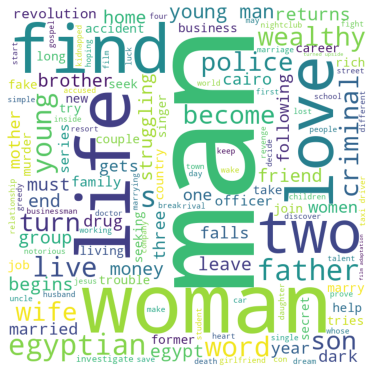

In [ ]:

# Wordcloud for cluster 
hierarchical_worldcloud(5)

In [ ]:
data[data['hierarchical_cluster'] == 6][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]

type                                title      director  \
24    TV Show  ​SAINT SEIYA: Knights of the Zodiac       Unknown   
107     Movie                           37 Seconds        Hikari   
111   TV Show                              44 Cats       Unknown   
141   TV Show                               7SEEDS       Unknown   
228     Movie                       A Silent Voice  Naoko Yamada   
...       ...                                  ...           ...   
7716    Movie                 Yoko and His Friends       Unknown   
7740  TV Show                    Your lie in April       Unknown   
7749  TV Show                            Yu-Gi-Oh!       Unknown   
7750  TV Show                      Yu-Gi-Oh! Arc-V       Unknown   
7775  TV Show                           Zoids Wild       Unknown   

                                                   cast country        rating  \
24    Bryson Baugus, Emily Neves, Blake Shepard, Pat...   Japan  Young Adults   
107   Mei Kayama, Misuzu Kanno, Shunsuke Daitoh, Mak...   Japan        Adults   
111   Sarah Natochenny, Suzy Myers, Simona Berman, E...   Italy    Older Kids   
141   Nao Toyama, Jun Fukuyama, Katsuyuki Konishi, Y...     nan        Adults   
228   Miyu Irino, Saori Hayami, Aoi Yuki, Kensho Ono...   Japan  Young Adults   
...                                                 ...     ...           ...   
7716  Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...  Russia          Kids   
7740  Natsuki Hanae, Risa Taneda, Ayane Sakura, Ryot...   Japan  Young Adults   
7749  Dan Green, Eric Stuart, Amy Birnbaum, Darren D...   Japan    Older Kids   
7750  Mike Liscio, Emily Bauer, Billy Bob Thompson, ...   Japan    Older Kids   
7775  Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...   Japan    Older Kids   

                     listed_in  \
24                Anime Series   
107                     Dramas   
111                   Kids' TV   
141               Anime Series   
228             Anime Features   
...                        ...   
7716  Children & Family Movies   
7740              Anime Series   
7749              Anime Series   
7750              Anime Series   
7775              Anime Series   

                                            description  
24    Seiya and the Knights of the Zodiac rise again...  
107   Trapped by society and familial obligations, a...  
111   Paw-esome tales abound when singing furry frie...  
141   Shy Natsu awakens as part of a group chosen to...  
228   A former class bully reaches out to the deaf g...  
...                                                 ...  
7716  Vik meets new friends in a new city, where the...  
7740  After his mother's death, a piano prodigy's wi...  
7749  The lives of young Yugi Moto and his friends J...  
7750  Now that he's discovered the Pendulum Summonin...  
7775  A quest for freedom and legendary treasure beg...  

[255 rows x 8 columns]

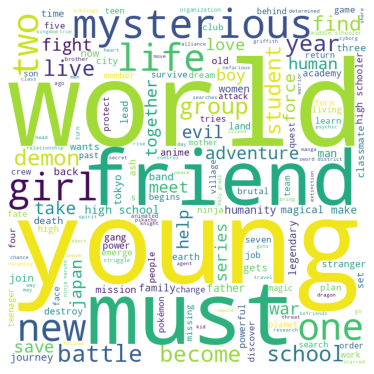

In [ ]:

# Wordcloud for cluster 
hierarchical_worldcloud(6)

In [ ]:
data[data['hierarchical_cluster'] == 7][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]

type                        title       director  \
27      Movie                       #Alive         Cho Il   
51    TV Show           100 Days My Prince        Unknown   
61    TV Show             12 Years Promise        Unknown   
91      Movie                     26 Years  Geun-hyun Cho   
95    TV Show                     28 Moons        Unknown   
...       ...                          ...            ...   
7551    Movie    What Happened to Mr. Cha?   Kim Dong-kyu   
7555  TV Show  What in the World Happened?        Unknown   
7583  TV Show     When the Camellia Blooms        Unknown   
7601  TV Show                 White Nights        Unknown   
7711  TV Show    YG Future Strategy Office        Unknown   

                                                   cast      country  \
27                             Yoo Ah-in, Park Shin-hye  South Korea   
51    Doh Kyung-soo, Nam Ji-hyun, Cho Seong-ha, Cho ...  South Korea   
61    So-yeon Lee, Namkoong Min, Tae-im Lee, So-hui ...  South Korea   
91    Goo Jin, Hye-jin Han, Soo-bin Bae, Seul-ong Im...  South Korea   
95    Jin-sung Yang, Kyu-jong Kim, Tae-hwan Kang, Ge...  South Korea   
...                                                 ...          ...   
7551           Cha In-pyo, Cho Dal-hwan, Song Jae-ryong  South Korea   
7555  Eun-mi Go, Jaehyo, Eun-Hyung Jo, Ha-yeon Kim, ...  South Korea   
7583  Kong Hyo-jin, Kang Ha-neul, Kim Ji-seok, Oh Ju...  South Korea   
7601  Yo-Won Lee, Goo Jin, U-ie, Hae-in Jung, Gook-h...  South Korea   
7711  Seungri, Yoo Byung Jae, Lee Jai-jin, Jinu, Son...  South Korea   

            rating               listed_in  \
27          Adults           Horror Movies   
51    Young Adults  International TV Shows   
61    Young Adults  International TV Shows   
91          Adults                  Dramas   
95      Older Kids  International TV Shows   
...            ...                     ...   
7551        Adults                Comedies   
7555  Young Adults  International TV Shows   
7583  Young Adults  International TV Shows   
7601  Young Adults  International TV Shows   
7711        Adults  International TV Shows   

                                            description  
27    As a grisly virus rampages a city, a lone man ...  
51    Upon losing his memory, a crown prince encount...  
61    A pregnant teen is forced by her family to lea...  
91    Twenty-six years after the 1980 massacre at Gw...  
95    When her fiancé acts strangely upon receiving ...  
...                                                 ...  
7551  With the peak of his career long behind him, a...  
7555  A happy secret romance between a 40-year-old w...  
7583  Dongbaek is a single mother. When a potential ...  
7601  A coldhearted heiress, a man from her past and...  
7711  K-pop star Seungri, BIGBANG's youngest member,...  

[170 rows x 8 columns]

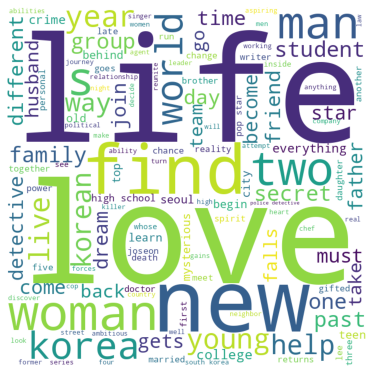

In [ ]:

# Wordcloud for cluster 
hierarchical_worldcloud(7)

In [ ]:
data[data['hierarchical_cluster'] == 8][['type','title','director','cast', 'country', 'rating', 'listed_in', 'description']]

type                                    title               director  \
13      Movie                                    2,215    Nottapon Boonprakob   
30      Movie                         #cats_the_mewvie       Michael Margolis   
35      Movie                                #Rucker50  Robert McCullough Jr.   
36      Movie                                  #Selfie         Cristina Jacob   
37      Movie                               #Selfie 69         Cristina Jacob   
...       ...                                      ...                    ...   
7686    Movie                   XV: Beyond the Tryline       Pierre Deschamps   
7717  TV Show                                      YOM                Unknown   
7784    Movie                        Zulu Man in Japan                Unknown   
7785  TV Show                    Zumbo's Just Desserts                Unknown   
7786    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS               Sam Dunn   

                                                   cast         country  \
13                                   Artiwara Kongmalai        Thailand   
30                                              Unknown          Canada   
35                                              Unknown   United States   
36    Flavia Hojda, Crina Semciuc, Olimpia Melinte, ...         Romania   
37    Maia Morgenstern, Olimpia Melinte, Crina Semci...         Romania   
...                                                 ...             ...   
7686                                            Unknown  United Kingdom   
7717  Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...             nan   
7784                                            Nasty C             nan   
7785                         Adriano Zumbo, Rachel Khoo       Australia   
7786                                            Unknown  United Kingdom   

            rating               listed_in  \
13          Adults           Documentaries   
30    Young Adults           Documentaries   
35      Older Kids           Documentaries   
36          Adults                Comedies   
37          Adults                Comedies   
...            ...                     ...   
7686  Young Adults           Documentaries   
7717    Older Kids                Kids' TV   
7784        Adults           Documentaries   
7785    Older Kids  International TV Shows   
7786        Adults           Documentaries   

                                            description  
13    This intimate documentary follows rock star Ar...  
30    This pawesome documentary explores how our fel...  
35    This documentary celebrates the 50th anniversa...  
36    Two days before their final exams, three teen ...  
37    After a painful breakup, a trio of party-lovin...  
...                                                 ...  
7686  Set against the 2015 Rugby World Cup, this doc...  
7717  With the mind of a human being, and the body o...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...  

[870 rows x 8 columns]

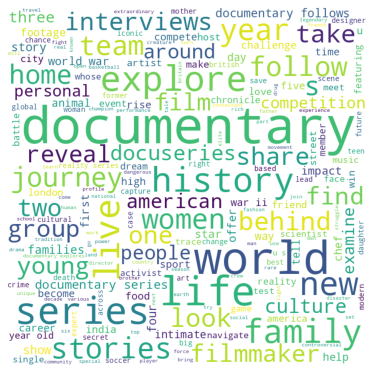

In [ ]:
# Wordcloud for cluster 
hierarchical_worldcloud(8)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **9.Procedure**

1. In this project, we worked on a text clustering problem wherein we had to classify/group the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.
2. The dataset contained about 7787 records, and 11 attributes.
3. We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows added on Netflix is growing exponentially.
4. Also, majority of the shows were produced in the United States, and the majority of the shows on Netflix were created for adults and young adults age group.
5. It was decided to cluster the data based on the attributes: director, cast, country, genre, and description. 
6. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.Through TFIDF Vectorization, we created a total of 20000 attributes.We used Principal Component Analysis (PCA) to handle the curse of dimensionality. 4000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 4000.
7. firstly built clusters using the k-means clustering algorithm, and the optimal number of clusters came out to be 6. This was obtained through the elbow method and Silhouette score analysis.
8. Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 12. This was obtained after visualizing the dendrogram.

# **Conclusion**

In conclusion, Netflix clustering using machine learning algorithms such as k-means and agglomerative hierarchy analysis can provide valuable insights into user behavior and preferences. By grouping users into clusters based on their viewing habits and ratings, Netflix can better understand their customers and provide personalized recommendations.

K-means clustering is a simple and efficient algorithm that can quickly group users into clusters based on their similarity. However, it requires specifying the number of clusters beforehand, which can be challenging. Agglomerative hierarchy analysis, on the other hand, does not require specifying the number of clusters beforehand and can create a hierarchy of clusters that provides additional insights into user behavior.

Both algorithms have their strengths and weaknesses, and the choice of algorithm will depend on the specific use case and the data available. However, by using clustering algorithms, Netflix can improve its recommendation system, increase customer satisfaction, and ultimately drive business growth.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***